<a href="https://colab.research.google.com/github/IBeliveInMagic/Covid_Dados/blob/main/Covid_19_Ocupation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
# Mudanças na forma de obtenção dos dados

#Ocupation- 2020
#!wget https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/LEITOS/2022-12-31/esus-vepi.LeitoOcupacao_2020.csv
#Ocupation- 2021
#!wget https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/LEITOS/2022-12-31/esus-vepi.LeitoOcupacao_2021.csv
#Ocupation- 2022
#!wget https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/LEITOS/2022-12-31/esus-vepi.LeitoOcupacao_2022.csv


In [158]:
import pandas as pd
import numpy as np
import csv
import datetime

from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta

# **Carregar os dados**



In [159]:
# Motando o drive para importar os datasets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [300]:
# Carregando os dados parte 1 estado de Goiás 
data_2020 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PFC1/Dados_Leitos/LeitoOcupacao_2020.csv',sep=',',low_memory=False)
data_2021 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PFC1/Dados_Leitos/LeitoOcupacao_2021.csv',sep=',',low_memory=False)
data_2022 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PFC1/Dados_Leitos/LeitoOcupacao_2022.csv',sep=',',low_memory=False)

# **Tratamento dos dados**

In [301]:
DF_Total = pd.concat([data_2020,data_2021,data_2022])

In [302]:
DF_Total

,Unnamed: 0,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,...,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
0,0,p5Ez41Zu6B,2020-04-14T03:00:00.000Z,2303167,0.0,0.0,0.0,0.0,NaN,NaN,...,aplicacao-web,_User$auVMjEVEVz,Santa Catarina,Itapema,Santa Catarina,Itapema,True,False,2020-04-15T13:44:30.085Z,2020-04-16T13:56:13.656Z
1,1,eUOMsSt7T7,2020-04-15T03:00:00.000Z,5935377\t,1.0,0.0,0.0,0.0,NaN,NaN,...,parse-cloud,_User$WBa5nfe9P9,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,False,False,2020-04-15T13:50:47.256Z,2020-08-01T20:08:13.116Z
2,2,QaG4oIBrMa,2020-04-15T14:57:16.255Z,0012599,15.0,1.0,3.0,2.0,NaN,NaN,...,parse-cloud,_User$6oxZQHBPQ7,Rio de Janeiro,Niterói,Rio de Janeiro,Niterói,False,False,2020-04-15T15:20:57.033Z,2020-08-01T20:02:12.729Z
3,3,ifya31F3ZF,2020-03-24T03:00:00.000Z,2562871,9.0,0.0,1.0,0.0,NaN,NaN,...,parse-cloud,_User$fhufIbmR9C,Ceará,Várzea Alegre,Ceará,Várzea Alegre,False,False,2020-04-15T16:58:32.839Z,2020-08-01T21:40:37.624Z
4,4,dkurDhelx9,2020-04-01T03:00:00.000Z,2252228,26.0,0.0,1.0,0.0,NaN,NaN,...,parse-cloud,_User$tkAdHTNhC9,Rio Grande do Sul,Encantado,Rio Grande do Sul,Encantado,False,False,2020-04-15T17:02:53.877Z,2020-08-01T21:37:53.664Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290703,1592898,UAGHQWhWWZ,2022-12-09T03:00:00.000Z,2468271,NaN,NaN,NaN,NaN,0.0,1.0,...,aplicacao-web,_User$HmQB6QiwVV,Tocantins,Pedro Afonso,Tocantins,Pedro Afonso,False,False,2023-01-10T19:46:48.470Z,2023-01-10T19:48:27.879Z
290704,1592900,YRGGQm5nkY,2022-12-10T03:00:00.000Z,2468271,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$HmQB6QiwVV,Tocantins,Pedro Afonso,Tocantins,Pedro Afonso,False,False,2023-01-10T19:49:18.215Z,2023-01-10T19:49:18.215Z
290705,1592901,klPP53C149,2022-12-11T03:00:00.000Z,2468271,NaN,NaN,NaN,NaN,0.0,1.0,...,parse-cloud,_User$HmQB6QiwVV,Tocantins,Pedro Afonso,Tocantins,Pedro Afonso,False,False,2023-01-10T19:50:47.395Z,2023-01-10T19:50:47.395Z
290706,1592910,JXRti9eU06,2022-12-12T03:00:00.000Z,2468271,NaN,NaN,NaN,NaN,0.0,1.0,...,parse-cloud,_User$HmQB6QiwVV,Tocantins,Pedro Afonso,Tocantins,Pedro Afonso,False,False,2023-01-10T20:03:10.659Z,2023-01-10T20:03:10.659Z


In [303]:
DF_Total.columns

Index(['Unnamed: 0', '_id', 'dataNotificacao', 'cnes', 'ocupacaoSuspeitoCli',
       'ocupacaoSuspeitoUti', 'ocupacaoConfirmadoCli', 'ocupacaoConfirmadoUti',
       'ocupacaoCovidUti', 'ocupacaoCovidCli', 'ocupacaoHospitalarUti',
       'ocupacaoHospitalarCli', 'saidaSuspeitaObitos', 'saidaSuspeitaAltas',
       'saidaConfirmadaObitos', 'saidaConfirmadaAltas', 'origem', '_p_usuario',
       'estadoNotificacao', 'municipioNotificacao', 'estado', 'municipio',
       'excluido', 'validado', '_created_at', '_updated_at'],
      dtype='object')

In [304]:
DF_Total = DF_Total.iloc[: , [2,7,14,18]]

In [305]:
# Ordenando as vacinas pela data de aplicação , em ordem crescente de data
DF_Total = DF_Total.sort_values(by=['dataNotificacao'])

In [306]:
DF_Total['dataNotificacao']= pd.to_datetime(DF_Total['dataNotificacao'])
DF_Total['dataNotificacao'] = pd.to_datetime(DF_Total['dataNotificacao']).dt.date
DF_Total['dataNotificacao'] = DF_Total['dataNotificacao'].apply(lambda x: str(x))
DF_Total['estadoNotificacao'] = DF_Total['estadoNotificacao'].apply(lambda x: str(x))

In [307]:
DF_Total_clear = DF_Total.dropna()

In [308]:
DF_Total_clear

,dataNotificacao,ocupacaoConfirmadoUti,saidaConfirmadaObitos,estadoNotificacao
545931,2020-01-01,0.0,0.0,Paraná
547071,2020-01-01,0.0,0.0,Minas Gerais
546185,2020-01-01,10.0,0.0,Pernambuco
546222,2020-01-01,3.0,0.0,Minas Gerais
545631,2020-01-01,0.0,0.0,Paraná
...,...,...,...,...
558967,2021-09-14,0.0,0.0,Minas Gerais
559504,2021-09-14,1.0,0.0,Minas Gerais
0,2021-11-26,0.0,0.0,Minas Gerais
554431,2021-12-25,0.0,0.0,Santa Catarina


# **Goiás**

In [311]:
# filtrar linhas e ficar somente com os estados do Centro Oeste - Goiás
df_mask=DF_Total_clear['estadoNotificacao']=='Goiás'
df_GO = DF_Total_clear[df_mask]

In [312]:
df_GO

,dataNotificacao,ocupacaoConfirmadoUti,saidaConfirmadaObitos,estadoNotificacao
550826,2020-01-05,15.0,0.0,Goiás
550978,2020-02-11,30.0,3.0,Goiás
550979,2020-02-15,33.0,1.0,Goiás
550980,2020-02-19,33.0,0.0,Goiás
550981,2020-02-20,34.0,0.0,Goiás
...,...,...,...,...
553228,2021-09-11,0.0,0.0,Goiás
554694,2021-09-12,0.0,0.0,Goiás
554492,2021-09-12,0.0,0.0,Goiás
554435,2021-09-12,0.0,0.0,Goiás


# **Mato Grosso**

In [313]:
# filtrar linhas e ficar somente com os estados do Centro Oeste - Mato Grosso
df_mask=DF_Total_clear['estadoNotificacao']=='Mato Grosso'
df_MT = DF_Total_clear[df_mask]

In [314]:
df_MT

,dataNotificacao,ocupacaoConfirmadoUti,saidaConfirmadaObitos,estadoNotificacao
552380,2020-01-10,15.0,2.0,Mato Grosso
22560,2020-03-12,0.0,0.0,Mato Grosso
56028,2020-03-19,0.0,0.0,Mato Grosso
56032,2020-03-20,0.0,0.0,Mato Grosso
56035,2020-03-21,0.0,0.0,Mato Grosso
...,...,...,...,...
551886,2021-09-10,23.0,2.0,Mato Grosso
552043,2021-09-10,6.0,0.0,Mato Grosso
553449,2021-09-11,0.0,0.0,Mato Grosso
554668,2021-09-12,0.0,0.0,Mato Grosso


# **Mato Grosso do Sul**

In [315]:
# filtrar linhas e ficar somente com os estados do Centro Oeste - Mato Grosos do Sul
df_mask=DF_Total_clear['estadoNotificacao']=='Mato Grosso do Sul'
df_MS = DF_Total_clear[df_mask]

In [316]:
df_MS

,dataNotificacao,ocupacaoConfirmadoUti,saidaConfirmadaObitos,estadoNotificacao
549803,2020-03-03,18.0,1.0,Mato Grosso do Sul
549805,2020-03-04,0.0,0.0,Mato Grosso do Sul
1268,2020-03-30,0.0,0.0,Mato Grosso do Sul
1291,2020-03-31,0.0,0.0,Mato Grosso do Sul
3588,2020-04-01,0.0,0.0,Mato Grosso do Sul
...,...,...,...,...
549110,2021-09-09,2.0,0.0,Mato Grosso do Sul
551284,2021-09-10,4.0,0.0,Mato Grosso do Sul
553164,2021-09-11,3.0,0.0,Mato Grosso do Sul
553355,2021-09-11,1.0,1.0,Mato Grosso do Sul


# **Distrito Federal**

In [317]:
# filtrar linhas e ficar somente com os estados do Centro Oeste - Distrito Federal
df_mask=DF_Total_clear['estadoNotificacao']=='Distrito Federal'
df_DF = DF_Total_clear[df_mask]

In [318]:
df_DF

,dataNotificacao,ocupacaoConfirmadoUti,saidaConfirmadaObitos,estadoNotificacao
546087,2020-01-02,14.0,2.0,Distrito Federal
545924,2020-01-02,2.0,0.0,Distrito Federal
550505,2020-01-19,3.0,0.0,Distrito Federal
247951,2020-02-07,0.0,0.0,Distrito Federal
550501,2020-02-19,3.0,0.0,Distrito Federal
...,...,...,...,...
553063,2021-09-11,9.0,0.0,Distrito Federal
553362,2021-09-11,0.0,0.0,Distrito Federal
553004,2021-09-11,0.0,2.0,Distrito Federal
554619,2021-09-12,0.0,0.0,Distrito Federal


# **Centro-Oeste**

In [319]:
frames = [df_DF, df_GO,df_MT,df_MS]
  
df_CO = pd.concat(frames)

In [320]:
df_CO

,dataNotificacao,ocupacaoConfirmadoUti,saidaConfirmadaObitos,estadoNotificacao
546087,2020-01-02,14.0,2.0,Distrito Federal
545924,2020-01-02,2.0,0.0,Distrito Federal
550505,2020-01-19,3.0,0.0,Distrito Federal
247951,2020-02-07,0.0,0.0,Distrito Federal
550501,2020-02-19,3.0,0.0,Distrito Federal
...,...,...,...,...
549110,2021-09-09,2.0,0.0,Mato Grosso do Sul
551284,2021-09-10,4.0,0.0,Mato Grosso do Sul
553164,2021-09-11,3.0,0.0,Mato Grosso do Sul
553355,2021-09-11,1.0,1.0,Mato Grosso do Sul


In [321]:
df_CO_Reserva = df_CO

# **Separar os DataFrames por mês**

**Janeiro**

In [322]:
df_20_mes = df_CO.query('dataNotificacao.str.startswith("2020-01").values')
df_21_mes = df_CO.query('dataNotificacao.str.startswith("2021-01").values')
df_22_mes = df_CO.query('dataNotificacao.str.startswith("2022-01").values')
df_mes1 = pd.concat([df_20_mes,df_21_mes,df_22_mes])

**Fevereiro**

In [323]:
df_20_mes = df_CO.query('dataNotificacao.str.startswith("2020-02").values')
df_21_mes = df_CO.query('dataNotificacao.str.startswith("2021-02").values')
df_22_mes = df_CO.query('dataNotificacao.str.startswith("2022-02").values')
df_mes2 = pd.concat([df_20_mes,df_21_mes,df_22_mes])

**Março**

In [324]:
df_20_mes = df_CO.query('dataNotificacao.str.startswith("2020-03").values')
df_21_mes = df_CO.query('dataNotificacao.str.startswith("2021-03").values')
df_22_mes = df_CO.query('dataNotificacao.str.startswith("2022-03").values')
df_mes3 = pd.concat([df_20_mes,df_21_mes,df_22_mes])

**Abril**

In [325]:
df_20_mes = df_CO.query('dataNotificacao.str.startswith("2020-04").values')
df_21_mes = df_CO.query('dataNotificacao.str.startswith("2021-04").values')
df_22_mes = df_CO.query('dataNotificacao.str.startswith("2022-04").values')
df_mes4 = pd.concat([df_20_mes,df_21_mes,df_22_mes])

**Maio**

In [326]:
df_20_mes = df_CO.query('dataNotificacao.str.startswith("2020-05").values')
df_21_mes = df_CO.query('dataNotificacao.str.startswith("2021-05").values')
df_22_mes = df_CO.query('dataNotificacao.str.startswith("2022-05").values')
df_mes5 = pd.concat([df_20_mes,df_21_mes,df_22_mes])

**Junho**

In [327]:
df_20_mes = df_CO.query('dataNotificacao.str.startswith("2020-06").values')
df_21_mes = df_CO.query('dataNotificacao.str.startswith("2021-06").values')
df_22_mes = df_CO.query('dataNotificacao.str.startswith("2022-06").values')
df_mes6 = pd.concat([df_20_mes,df_21_mes,df_22_mes])

**Julho**

In [328]:
df_20_mes = df_CO.query('dataNotificacao.str.startswith("2020-07").values')
df_21_mes = df_CO.query('dataNotificacao.str.startswith("2021-07").values')
df_22_mes = df_CO.query('dataNotificacao.str.startswith("2022-07").values')
df_mes7 = pd.concat([df_20_mes,df_21_mes,df_22_mes])

**Agosto**

In [329]:
df_20_mes = df_CO.query('dataNotificacao.str.startswith("2020-08").values')
df_21_mes = df_CO.query('dataNotificacao.str.startswith("2021-08").values')
df_22_mes = df_CO.query('dataNotificacao.str.startswith("2022-08").values')
df_mes8 = pd.concat([df_20_mes,df_21_mes,df_22_mes])

**Setembro**

In [330]:
df_20_mes = df_CO.query('dataNotificacao.str.startswith("2020-09").values')
df_21_mes = df_CO.query('dataNotificacao.str.startswith("2021-09").values')
df_22_mes = df_CO.query('dataNotificacao.str.startswith("2022-09").values')
df_mes9 = pd.concat([df_20_mes,df_21_mes,df_22_mes])

**Outubro**

In [331]:
df_20_mes = df_CO.query('dataNotificacao.str.startswith("2020-10").values')
df_21_mes = df_CO.query('dataNotificacao.str.startswith("2021-10").values')
df_22_mes = df_CO.query('dataNotificacao.str.startswith("2022-10").values')
df_mes10 = pd.concat([df_20_mes,df_21_mes,df_22_mes])

**Novembro**

In [332]:
df_20_mes = df_CO.query('dataNotificacao.str.startswith("2020-11").values')
df_21_mes = df_CO.query('dataNotificacao.str.startswith("2021-11").values')
df_22_mes = df_CO.query('dataNotificacao.str.startswith("2022-11").values')
df_mes11 = pd.concat([df_20_mes,df_21_mes,df_22_mes])

**Dezembro**

In [333]:
df_20_mes = df_CO.query('dataNotificacao.str.startswith("2020-12").values')
df_21_mes = df_CO.query('dataNotificacao.str.startswith("2021-12").values')
df_22_mes = df_CO.query('dataNotificacao.str.startswith("2022-12").values')
df_mes12 = pd.concat([df_20_mes,df_21_mes,df_22_mes])

# **Tratamento de dados - Goiás**

**Goiás**

In [334]:
df_GO_ocupacao = df_GO.iloc[:,[0,1]]
df_GO_ocupacao

,dataNotificacao,ocupacaoConfirmadoUti
550826,2020-01-05,15.0
550978,2020-02-11,30.0
550979,2020-02-15,33.0
550980,2020-02-19,33.0
550981,2020-02-20,34.0
...,...,...
553228,2021-09-11,0.0
554694,2021-09-12,0.0
554492,2021-09-12,0.0
554435,2021-09-12,0.0


In [335]:
df_GO_obitos = df_GO.iloc[:,[0,2]]
df_GO_obitos

,dataNotificacao,saidaConfirmadaObitos
550826,2020-01-05,0.0
550978,2020-02-11,3.0
550979,2020-02-15,1.0
550980,2020-02-19,0.0
550981,2020-02-20,0.0
...,...,...
553228,2021-09-11,0.0
554694,2021-09-12,0.0
554492,2021-09-12,0.0
554435,2021-09-12,0.0


**Separar os anos dos meses**

In [336]:
Result_GO = pd.DataFrame()
Result_GO_Obitos = pd.DataFrame()



> 2020

In [337]:
Result_GO['Janeiro 2020'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2020-01").values').sum()
Result_GO['Fevereiro 2020'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2020-02").values').sum()
Result_GO['Março 2020'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2020-03").values').sum()
Result_GO['Abril 2020'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2020-04").values').sum()
Result_GO['Maio 2020'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2020-05").values').sum()
Result_GO['Junho 2020'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2020-06").values').sum()

In [338]:
Result_GO['Julho 2020'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2020-07").values').sum()
Result_GO['Agosto 2020'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2020-08").values').sum()
Result_GO['Setembro 2020'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2020-09").values').sum()
Result_GO['Outubro 2020'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2020-10").values').sum()
Result_GO['Novembro 2020'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2020-11").values').sum()
Result_GO['Dezembro 2020'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2020-12").values').sum()

In [339]:
Result_GO_Obitos['Janeiro 2020'] = df_GO_obitos.query('dataNotificacao.str.startswith("2020-01").values').sum()
Result_GO_Obitos['Fevereiro 2020'] = df_GO_obitos.query('dataNotificacao.str.startswith("2020-02").values').sum()
Result_GO_Obitos['Março 2020'] = df_GO_obitos.query('dataNotificacao.str.startswith("2020-03").values').sum()
Result_GO_Obitos['Abril 2020'] = df_GO_obitos.query('dataNotificacao.str.startswith("2020-04").values').sum()
Result_GO_Obitos['Maio 2020'] = df_GO_obitos.query('dataNotificacao.str.startswith("2020-05").values').sum()
Result_GO_Obitos['Junho 2020'] = df_GO_obitos.query('dataNotificacao.str.startswith("2020-06").values').sum()

In [340]:
Result_GO_Obitos['Julho 2020'] = df_GO_obitos.query('dataNotificacao.str.startswith("2020-07").values').sum()
Result_GO_Obitos['Agosto 2020'] = df_GO_obitos.query('dataNotificacao.str.startswith("2020-08").values').sum()
Result_GO_Obitos['Setembro 2020'] = df_GO_obitos.query('dataNotificacao.str.startswith("2020-09").values').sum()
Result_GO_Obitos['Outubro 2020'] = df_GO_obitos.query('dataNotificacao.str.startswith("2020-10").values').sum()
Result_GO_Obitos['Novembro 2020'] = df_GO_obitos.query('dataNotificacao.str.startswith("2020-11").values').sum()
Result_GO_Obitos['Dezembro 2020'] = df_GO_obitos.query('dataNotificacao.str.startswith("2020-12").values').sum()



> 2021



In [341]:
Result_GO['Janeiro 2021'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2021-01").values').sum()
Result_GO['Fevereiro 2021'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2021-02").values').sum()
Result_GO['Março 2021'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2021-03").values').sum()
Result_GO['Abril 2021'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2021-04").values').sum()
Result_GO['Maio 2021'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2021-05").values').sum()
Result_GO['Junho 2021'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2021-06").values').sum()

In [342]:
Result_GO['Julho 2021'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2021-07").values').sum()
Result_GO['Agosto 2021'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2021-08").values').sum()
Result_GO['Setembro 2021'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2021-09").values').sum()
Result_GO['Outubro 2021'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2021-10").values').sum()
Result_GO['Novembro 2021'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2021-11").values').sum()
Result_GO['Dezembro 2021'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2021-12").values').sum()

In [343]:
Result_GO_Obitos['Janeiro 2021'] = df_GO_obitos.query('dataNotificacao.str.startswith("2021-01").values').sum()
Result_GO_Obitos['Fevereiro 2021'] = df_GO_obitos.query('dataNotificacao.str.startswith("2021-02").values').sum()
Result_GO_Obitos['Março 2021'] = df_GO_obitos.query('dataNotificacao.str.startswith("2021-03").values').sum()
Result_GO_Obitos['Abril 2021'] = df_GO_obitos.query('dataNotificacao.str.startswith("2021-04").values').sum()
Result_GO_Obitos['Maio 2021'] = df_GO_obitos.query('dataNotificacao.str.startswith("2021-05").values').sum()
Result_GO_Obitos['Junho 2021'] = df_GO_obitos.query('dataNotificacao.str.startswith("2021-06").values').sum()

In [344]:
Result_GO_Obitos['Julho 2021'] = df_GO_obitos.query('dataNotificacao.str.startswith("2021-07").values').sum()
Result_GO_Obitos['Agosto 2021'] = df_GO_obitos.query('dataNotificacao.str.startswith("2021-08").values').sum()
Result_GO_Obitos['Setembro 2021'] = df_GO_obitos.query('dataNotificacao.str.startswith("2021-09").values').sum()
Result_GO_Obitos['Outubro 2021'] = df_GO_obitos.query('dataNotificacao.str.startswith("2021-10").values').sum()
Result_GO_Obitos['Novembro 2021'] = df_GO_obitos.query('dataNotificacao.str.startswith("2021-11").values').sum()
Result_GO_Obitos['Dezembro 2021'] = df_GO_obitos.query('dataNotificacao.str.startswith("2021-12").values').sum()



> 2022



In [345]:
Result_GO['Janeiro 2022'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2022-01").values').sum()
Result_GO['Fevereiro 2022'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2022-02").values').sum()
Result_GO['Março 2022'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2022-03").values').sum()
Result_GO['Abril 2022'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2022-04").values').sum()
Result_GO['Maio 2022'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2022-05").values').sum()
Result_GO['Junho 2022'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2022-06").values').sum()

In [346]:
Result_GO['Julho 2022'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2022-07").values').sum()
Result_GO['Agosto 2022'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2022-08").values').sum()
Result_GO['Setembro 2022'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2022-09").values').sum()
Result_GO['Outubro 2022'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2022-10").values').sum()
Result_GO['Novembro 2022'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2022-11").values').sum()
Result_GO['Dezembro 2022'] = df_GO_ocupacao.query('dataNotificacao.str.startswith("2022-12").values').sum()

In [347]:
Result_GO_Obitos['Janeiro 2022'] = df_GO_obitos.query('dataNotificacao.str.startswith("2022-01").values').sum()
Result_GO_Obitos['Fevereiro 2022'] = df_GO_obitos.query('dataNotificacao.str.startswith("2022-02").values').sum()
Result_GO_Obitos['Março 2022'] = df_GO_obitos.query('dataNotificacao.str.startswith("2022-03").values').sum()
Result_GO_Obitos['Abril 2022'] = df_GO_obitos.query('dataNotificacao.str.startswith("2022-04").values').sum()
Result_GO_Obitos['Maio 2022'] = df_GO_obitos.query('dataNotificacao.str.startswith("2022-05").values').sum()
Result_GO_Obitos['Junho 2022'] = df_GO_obitos.query('dataNotificacao.str.startswith("2022-06").values').sum()

In [348]:
Result_GO_Obitos['Julho 2022'] = df_GO_obitos.query('dataNotificacao.str.startswith("2022-07").values').sum()
Result_GO_Obitos['Agosto 2022'] = df_GO_obitos.query('dataNotificacao.str.startswith("2022-08").values').sum()
Result_GO_Obitos['Setembro 2022'] = df_GO_obitos.query('dataNotificacao.str.startswith("2022-09").values').sum()
Result_GO_Obitos['Outubro 2022'] = df_GO_obitos.query('dataNotificacao.str.startswith("2022-10").values').sum()
Result_GO_Obitos['Novembro 2022'] = df_GO_obitos.query('dataNotificacao.str.startswith("2022-11").values').sum()
Result_GO_Obitos['Dezembro 2022'] = df_GO_obitos.query('dataNotificacao.str.startswith("2022-12").values').sum()

In [349]:
Result_GO

,Janeiro 2020,Fevereiro 2020,Março 2020,Abril 2020,Maio 2020,Junho 2020,Julho 2020,Agosto 2020,Setembro 2020,Outubro 2020,...,Março 2022,Abril 2022,Maio 2022,Junho 2022,Julho 2022,Agosto 2022,Setembro 2022,Outubro 2022,Novembro 2022,Dezembro 2022
dataNotificacao,2020-01-05,2020-02-112020-02-152020-02-192020-02-202020-0...,2020-03-272020-03-282020-03-292020-03-302020-0...,2020-04-012020-04-012020-04-012020-04-012020-0...,2020-05-012020-05-012020-05-012020-05-012020-0...,2020-06-012020-06-012020-06-012020-06-012020-0...,2020-07-012020-07-012020-07-012020-07-012020-0...,2020-08-012020-08-012020-08-012020-08-012020-0...,2020-09-012020-09-012020-09-012020-09-012020-0...,2020-10-012020-10-012020-10-012020-10-012020-1...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ocupacaoConfirmadoUti,15.0,217.0,100.0,1499.0,2097.0,4126.0,20002.0,21677.0,19943.0,14757.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [350]:
Result_GO = Result_GO.drop('dataNotificacao')
Result_GO = Result_GO.T

In [351]:
Result_GO

,ocupacaoConfirmadoUti
Janeiro 2020,15.0
Fevereiro 2020,217.0
Março 2020,100.0
Abril 2020,1499.0
Maio 2020,2097.0
Junho 2020,4126.0
Julho 2020,20002.0
Agosto 2020,21677.0
Setembro 2020,19943.0
Outubro 2020,14757.0


In [352]:
Result_GO_Obitos

,Janeiro 2020,Fevereiro 2020,Março 2020,Abril 2020,Maio 2020,Junho 2020,Julho 2020,Agosto 2020,Setembro 2020,Outubro 2020,...,Março 2022,Abril 2022,Maio 2022,Junho 2022,Julho 2022,Agosto 2022,Setembro 2022,Outubro 2022,Novembro 2022,Dezembro 2022
dataNotificacao,2020-01-05,2020-02-112020-02-152020-02-192020-02-202020-0...,2020-03-272020-03-282020-03-292020-03-302020-0...,2020-04-012020-04-012020-04-012020-04-012020-0...,2020-05-012020-05-012020-05-012020-05-012020-0...,2020-06-012020-06-012020-06-012020-06-012020-0...,2020-07-012020-07-012020-07-012020-07-012020-0...,2020-08-012020-08-012020-08-012020-08-012020-0...,2020-09-012020-09-012020-09-012020-09-012020-0...,2020-10-012020-10-012020-10-012020-10-012020-1...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
saidaConfirmadaObitos,0.0,9.0,3.0,112.0,55.0,124.0,1548.0,2751.0,3862.0,3869.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [353]:
Result_GO_Obitos = Result_GO_Obitos.drop('dataNotificacao')
Result_GO_Obitos = Result_GO_Obitos.T

In [354]:
Result_GO_Obitos

,saidaConfirmadaObitos
Janeiro 2020,0.0
Fevereiro 2020,9.0
Março 2020,3.0
Abril 2020,112.0
Maio 2020,55.0
Junho 2020,124.0
Julho 2020,1548.0
Agosto 2020,2751.0
Setembro 2020,3862.0
Outubro 2020,3869.0


# **Tratamento de dados - Mato Grosso**

**Mato Grosso**

In [355]:
df_MT_ocupacao = df_MT.iloc[:,[0,1]]
df_MT_ocupacao

,dataNotificacao,ocupacaoConfirmadoUti
552380,2020-01-10,15.0
22560,2020-03-12,0.0
56028,2020-03-19,0.0
56032,2020-03-20,0.0
56035,2020-03-21,0.0
...,...,...
551886,2021-09-10,23.0
552043,2021-09-10,6.0
553449,2021-09-11,0.0
554668,2021-09-12,0.0


In [356]:
df_MT_obitos = df_MT.iloc[:,[0,2]]
df_MT_obitos

,dataNotificacao,saidaConfirmadaObitos
552380,2020-01-10,2.0
22560,2020-03-12,0.0
56028,2020-03-19,0.0
56032,2020-03-20,0.0
56035,2020-03-21,0.0
...,...,...
551886,2021-09-10,2.0
552043,2021-09-10,0.0
553449,2021-09-11,0.0
554668,2021-09-12,0.0


**Separar os anos dos meses**

In [357]:
Result_MT = pd.DataFrame()
Result_MT_Obitos = pd.DataFrame()



> 2020

In [358]:
Result_MT['Janeiro 2020'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2020-01").values').sum()
Result_MT['Fevereiro 2020'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2020-02").values').sum()
Result_MT['Março 2020'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2020-03").values').sum()
Result_MT['Abril 2020'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2020-04").values').sum()
Result_MT['Maio 2020'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2020-05").values').sum()
Result_MT['Junho 2020'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2020-06").values').sum()

In [359]:
Result_MT['Julho 2020'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2020-07").values').sum()
Result_MT['Agosto 2020'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2020-08").values').sum()
Result_MT['Setembro 2020'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2020-09").values').sum()
Result_MT['Outubro 2020'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2020-10").values').sum()
Result_MT['Novembro 2020'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2020-11").values').sum()
Result_MT['Dezembro 2020'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2020-12").values').sum()

In [360]:
Result_MT_Obitos['Janeiro 2020'] = df_MT_obitos.query('dataNotificacao.str.startswith("2020-01").values').sum()
Result_MT_Obitos['Fevereiro 2020'] = df_MT_obitos.query('dataNotificacao.str.startswith("2020-02").values').sum()
Result_MT_Obitos['Março 2020'] = df_MT_obitos.query('dataNotificacao.str.startswith("2020-03").values').sum()
Result_MT_Obitos['Abril 2020'] = df_MT_obitos.query('dataNotificacao.str.startswith("2020-04").values').sum()
Result_MT_Obitos['Maio 2020'] = df_MT_obitos.query('dataNotificacao.str.startswith("2020-05").values').sum()
Result_MT_Obitos['Junho 2020'] = df_MT_obitos.query('dataNotificacao.str.startswith("2020-06").values').sum()

In [361]:
Result_MT_Obitos['Julho 2020'] = df_MT_obitos.query('dataNotificacao.str.startswith("2020-07").values').sum()
Result_MT_Obitos['Agosto 2020'] = df_MT_obitos.query('dataNotificacao.str.startswith("2020-08").values').sum()
Result_MT_Obitos['Setembro 2020'] = df_MT_obitos.query('dataNotificacao.str.startswith("2020-09").values').sum()
Result_MT_Obitos['Outubro 2020'] = df_MT_obitos.query('dataNotificacao.str.startswith("2020-10").values').sum()
Result_MT_Obitos['Novembro 2020'] = df_MT_obitos.query('dataNotificacao.str.startswith("2020-11").values').sum()
Result_MT_Obitos['Dezembro 2020'] = df_MT_obitos.query('dataNotificacao.str.startswith("2020-12").values').sum()



> 2021



In [362]:
Result_MT['Janeiro 2021'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2021-01").values').sum()
Result_MT['Fevereiro 2021'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2021-02").values').sum()
Result_MT['Março 2021'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2021-03").values').sum()
Result_MT['Abril 2021'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2021-04").values').sum()
Result_MT['Maio 2021'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2021-05").values').sum()
Result_MT['Junho 2021'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2021-06").values').sum()

In [363]:
Result_MT['Julho 2021'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2021-07").values').sum()
Result_MT['Agosto 2021'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2021-08").values').sum()
Result_MT['Setembro 2021'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2021-09").values').sum()
Result_MT['Outubro 2021'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2021-10").values').sum()
Result_MT['Novembro 2021'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2021-11").values').sum()
Result_MT['Dezembro 2021'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2021-12").values').sum()

In [364]:
Result_MT_Obitos['Janeiro 2021'] = df_MT_obitos.query('dataNotificacao.str.startswith("2021-01").values').sum()
Result_MT_Obitos['Fevereiro 2021'] = df_MT_obitos.query('dataNotificacao.str.startswith("2021-02").values').sum()
Result_MT_Obitos['Março 2021'] = df_MT_obitos.query('dataNotificacao.str.startswith("2021-03").values').sum()
Result_MT_Obitos['Abril 2021'] = df_MT_obitos.query('dataNotificacao.str.startswith("2021-04").values').sum()
Result_MT_Obitos['Maio 2021'] = df_MT_obitos.query('dataNotificacao.str.startswith("2021-05").values').sum()
Result_MT_Obitos['Junho 2021'] = df_MT_obitos.query('dataNotificacao.str.startswith("2021-06").values').sum()

In [365]:
Result_MT_Obitos['Julho 2021'] = df_MT_obitos.query('dataNotificacao.str.startswith("2021-07").values').sum()
Result_MT_Obitos['Agosto 2021'] = df_MT_obitos.query('dataNotificacao.str.startswith("2021-08").values').sum()
Result_MT_Obitos['Setembro 2021'] = df_MT_obitos.query('dataNotificacao.str.startswith("2021-09").values').sum()
Result_MT_Obitos['Outubro 2021'] = df_MT_obitos.query('dataNotificacao.str.startswith("2021-10").values').sum()
Result_MT_Obitos['Novembro 2021'] = df_MT_obitos.query('dataNotificacao.str.startswith("2021-11").values').sum()
Result_MT_Obitos['Dezembro 2021'] = df_MT_obitos.query('dataNotificacao.str.startswith("2021-12").values').sum()



> 2022



In [366]:
Result_MT['Janeiro 2022'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2022-01").values').sum()
Result_MT['Fevereiro 2022'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2022-02").values').sum()
Result_MT['Março 2022'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2022-03").values').sum()
Result_MT['Abril 2022'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2022-04").values').sum()
Result_MT['Maio 2022'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2022-05").values').sum()
Result_MT['Junho 2022'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2022-06").values').sum()

In [367]:
Result_MT['Julho 2022'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2022-07").values').sum()
Result_MT['Agosto 2022'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2022-08").values').sum()
Result_MT['Setembro 2022'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2022-09").values').sum()
Result_MT['Outubro 2022'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2022-10").values').sum()
Result_MT['Novembro 2022'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2022-11").values').sum()
Result_MT['Dezembro 2022'] = df_MT_ocupacao.query('dataNotificacao.str.startswith("2022-12").values').sum()

In [368]:
Result_MT_Obitos['Janeiro 2022'] = df_MT_obitos.query('dataNotificacao.str.startswith("2022-01").values').sum()
Result_MT_Obitos['Fevereiro 2022'] = df_MT_obitos.query('dataNotificacao.str.startswith("2022-02").values').sum()
Result_MT_Obitos['Março 2022'] = df_MT_obitos.query('dataNotificacao.str.startswith("2022-03").values').sum()
Result_MT_Obitos['Abril 2022'] = df_MT_obitos.query('dataNotificacao.str.startswith("2022-04").values').sum()
Result_MT_Obitos['Maio 2022'] = df_MT_obitos.query('dataNotificacao.str.startswith("2022-05").values').sum()
Result_MT_Obitos['Junho 2022'] = df_MT_obitos.query('dataNotificacao.str.startswith("2022-06").values').sum()

In [369]:
Result_MT_Obitos['Julho 2022'] = df_MT_obitos.query('dataNotificacao.str.startswith("2022-07").values').sum()
Result_MT_Obitos['Agosto 2022'] = df_MT_obitos.query('dataNotificacao.str.startswith("2022-08").values').sum()
Result_MT_Obitos['Setembro 2022'] = df_MT_obitos.query('dataNotificacao.str.startswith("2022-09").values').sum()
Result_MT_Obitos['Outubro 2022'] = df_MT_obitos.query('dataNotificacao.str.startswith("2022-10").values').sum()
Result_MT_Obitos['Novembro 2022'] = df_MT_obitos.query('dataNotificacao.str.startswith("2022-11").values').sum()
Result_MT_Obitos['Dezembro 2022'] = df_MT_obitos.query('dataNotificacao.str.startswith("2022-12").values').sum()

In [370]:
Result_MT

,Janeiro 2020,Fevereiro 2020,Março 2020,Abril 2020,Maio 2020,Junho 2020,Julho 2020,Agosto 2020,Setembro 2020,Outubro 2020,...,Março 2022,Abril 2022,Maio 2022,Junho 2022,Julho 2022,Agosto 2022,Setembro 2022,Outubro 2022,Novembro 2022,Dezembro 2022
dataNotificacao,2020-01-10,0.0,2020-03-122020-03-192020-03-202020-03-212020-0...,2020-04-012020-04-012020-04-012020-04-012020-0...,2020-05-012020-05-012020-05-012020-05-012020-0...,2020-06-012020-06-012020-06-012020-06-012020-0...,2020-07-012020-07-012020-07-012020-07-012020-0...,2020-08-012020-08-012020-08-012020-08-012020-0...,2020-09-012020-09-012020-09-012020-09-012020-0...,2020-10-012020-10-012020-10-012020-10-012020-1...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ocupacaoConfirmadoUti,15.0,0.0,0.0,71.0,646.0,3281.0,5862.0,10242.0,7868.0,5863.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [371]:
Result_MT = Result_MT.drop('dataNotificacao')
Result_MT = Result_MT.T

In [372]:
Result_MT

,ocupacaoConfirmadoUti
Janeiro 2020,15.0
Fevereiro 2020,0.0
Março 2020,0.0
Abril 2020,71.0
Maio 2020,646.0
Junho 2020,3281.0
Julho 2020,5862.0
Agosto 2020,10242.0
Setembro 2020,7868.0
Outubro 2020,5863.0


In [373]:
Result_MT_Obitos

,Janeiro 2020,Fevereiro 2020,Março 2020,Abril 2020,Maio 2020,Junho 2020,Julho 2020,Agosto 2020,Setembro 2020,Outubro 2020,...,Março 2022,Abril 2022,Maio 2022,Junho 2022,Julho 2022,Agosto 2022,Setembro 2022,Outubro 2022,Novembro 2022,Dezembro 2022
dataNotificacao,2020-01-10,0.0,2020-03-122020-03-192020-03-202020-03-212020-0...,2020-04-012020-04-012020-04-012020-04-012020-0...,2020-05-012020-05-012020-05-012020-05-012020-0...,2020-06-012020-06-012020-06-012020-06-012020-0...,2020-07-012020-07-012020-07-012020-07-012020-0...,2020-08-012020-08-012020-08-012020-08-012020-0...,2020-09-012020-09-012020-09-012020-09-012020-0...,2020-10-012020-10-012020-10-012020-10-012020-1...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
saidaConfirmadaObitos,2.0,0.0,0.0,3.0,19.0,202.0,405.0,456.0,299.0,155.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [374]:
Result_MT_Obitos = Result_MT_Obitos.drop('dataNotificacao')
Result_MT_Obitos = Result_MT_Obitos.T

In [375]:
Result_MT_Obitos

,saidaConfirmadaObitos
Janeiro 2020,2.0
Fevereiro 2020,0.0
Março 2020,0.0
Abril 2020,3.0
Maio 2020,19.0
Junho 2020,202.0
Julho 2020,405.0
Agosto 2020,456.0
Setembro 2020,299.0
Outubro 2020,155.0


# **Tratamento de dados - Mato Grosso do Sul**

**Mato Grosso do Sul**

In [376]:
df_MS_ocupacao = df_MS.iloc[:,[0,1]]
df_MS_ocupacao

,dataNotificacao,ocupacaoConfirmadoUti
549803,2020-03-03,18.0
549805,2020-03-04,0.0
1268,2020-03-30,0.0
1291,2020-03-31,0.0
3588,2020-04-01,0.0
...,...,...
549110,2021-09-09,2.0
551284,2021-09-10,4.0
553164,2021-09-11,3.0
553355,2021-09-11,1.0


In [377]:
df_MS_obitos = df_MS.iloc[:,[0,2]]
df_MS_obitos

,dataNotificacao,saidaConfirmadaObitos
549803,2020-03-03,1.0
549805,2020-03-04,0.0
1268,2020-03-30,0.0
1291,2020-03-31,0.0
3588,2020-04-01,0.0
...,...,...
549110,2021-09-09,0.0
551284,2021-09-10,0.0
553164,2021-09-11,0.0
553355,2021-09-11,1.0


**Separar os anos dos meses**

In [378]:
Result_MS = pd.DataFrame()
Result_MS_Obitos = pd.DataFrame()



> 2020

In [379]:
Result_MS['Janeiro 2020'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2020-01").values').sum()
Result_MS['Fevereiro 2020'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2020-02").values').sum()
Result_MS['Março 2020'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2020-03").values').sum()
Result_MS['Abril 2020'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2020-04").values').sum()
Result_MS['Maio 2020'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2020-05").values').sum()
Result_MS['Junho 2020'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2020-06").values').sum()

In [380]:
Result_MS['Julho 2020'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2020-07").values').sum()
Result_MS['Agosto 2020'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2020-08").values').sum()
Result_MS['Setembro 2020'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2020-09").values').sum()
Result_MS['Outubro 2020'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2020-10").values').sum()
Result_MS['Novembro 2020'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2020-11").values').sum()
Result_MS['Dezembro 2020'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2020-12").values').sum()

In [381]:
Result_MS_Obitos['Janeiro 2020'] = df_MS_obitos.query('dataNotificacao.str.startswith("2020-01").values').sum()
Result_MS_Obitos['Fevereiro 2020'] = df_MS_obitos.query('dataNotificacao.str.startswith("2020-02").values').sum()
Result_MS_Obitos['Março 2020'] = df_MS_obitos.query('dataNotificacao.str.startswith("2020-03").values').sum()
Result_MS_Obitos['Abril 2020'] = df_MS_obitos.query('dataNotificacao.str.startswith("2020-04").values').sum()
Result_MS_Obitos['Maio 2020'] = df_MS_obitos.query('dataNotificacao.str.startswith("2020-05").values').sum()
Result_MS_Obitos['Junho 2020'] = df_MS_obitos.query('dataNotificacao.str.startswith("2020-06").values').sum()

In [382]:
Result_MS_Obitos['Julho 2020'] = df_MS_obitos.query('dataNotificacao.str.startswith("2020-07").values').sum()
Result_MS_Obitos['Agosto 2020'] = df_MS_obitos.query('dataNotificacao.str.startswith("2020-08").values').sum()
Result_MS_Obitos['Setembro 2020'] = df_MS_obitos.query('dataNotificacao.str.startswith("2020-09").values').sum()
Result_MS_Obitos['Outubro 2020'] = df_MS_obitos.query('dataNotificacao.str.startswith("2020-10").values').sum()
Result_MS_Obitos['Novembro 2020'] = df_MS_obitos.query('dataNotificacao.str.startswith("2020-11").values').sum()
Result_MS_Obitos['Dezembro 2020'] = df_MS_obitos.query('dataNotificacao.str.startswith("2020-12").values').sum()



> 2021



In [383]:
Result_MS['Janeiro 2021'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2021-01").values').sum()
Result_MS['Fevereiro 2021'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2021-02").values').sum()
Result_MS['Março 2021'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2021-03").values').sum()
Result_MS['Abril 2021'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2021-04").values').sum()
Result_MS['Maio 2021'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2021-05").values').sum()
Result_MS['Junho 2021'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2021-06").values').sum()

In [384]:
Result_MS['Julho 2021'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2021-07").values').sum()
Result_MS['Agosto 2021'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2021-08").values').sum()
Result_MS['Setembro 2021'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2021-09").values').sum()
Result_MS['Outubro 2021'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2021-10").values').sum()
Result_MS['Novembro 2021'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2021-11").values').sum()
Result_MS['Dezembro 2021'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2021-12").values').sum()

In [385]:
Result_MS_Obitos['Janeiro 2021'] = df_MS_obitos.query('dataNotificacao.str.startswith("2021-01").values').sum()
Result_MS_Obitos['Fevereiro 2021'] = df_MS_obitos.query('dataNotificacao.str.startswith("2021-02").values').sum()
Result_MS_Obitos['Março 2021'] = df_MS_obitos.query('dataNotificacao.str.startswith("2021-03").values').sum()
Result_MS_Obitos['Abril 2021'] = df_MS_obitos.query('dataNotificacao.str.startswith("2021-04").values').sum()
Result_MS_Obitos['Maio 2021'] = df_MS_obitos.query('dataNotificacao.str.startswith("2021-05").values').sum()
Result_MS_Obitos['Junho 2021'] = df_MS_obitos.query('dataNotificacao.str.startswith("2021-06").values').sum()

In [386]:
Result_MS_Obitos['Julho 2021'] = df_MS_obitos.query('dataNotificacao.str.startswith("2021-07").values').sum()
Result_MS_Obitos['Agosto 2021'] = df_MS_obitos.query('dataNotificacao.str.startswith("2021-08").values').sum()
Result_MS_Obitos['Setembro 2021'] = df_MS_obitos.query('dataNotificacao.str.startswith("2021-09").values').sum()
Result_MS_Obitos['Outubro 2021'] = df_MS_obitos.query('dataNotificacao.str.startswith("2021-10").values').sum()
Result_MS_Obitos['Novembro 2021'] = df_MS_obitos.query('dataNotificacao.str.startswith("2021-11").values').sum()
Result_MS_Obitos['Dezembro 2021'] = df_MS_obitos.query('dataNotificacao.str.startswith("2021-12").values').sum()



> 2022



In [387]:
Result_MS['Janeiro 2022'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2022-01").values').sum()
Result_MS['Fevereiro 2022'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2022-02").values').sum()
Result_MS['Março 2022'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2022-03").values').sum()
Result_MS['Abril 2022'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2022-04").values').sum()
Result_MS['Maio 2022'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2022-05").values').sum()
Result_MS['Junho 2022'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2022-06").values').sum()

In [388]:
Result_MS['Julho 2022'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2022-07").values').sum()
Result_MS['Agosto 2022'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2022-08").values').sum()
Result_MS['Setembro 2022'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2022-09").values').sum()
Result_MS['Outubro 2022'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2022-10").values').sum()
Result_MS['Novembro 2022'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2022-11").values').sum()
Result_MS['Dezembro 2022'] = df_MS_ocupacao.query('dataNotificacao.str.startswith("2022-12").values').sum()

In [389]:
Result_MS_Obitos['Janeiro 2022'] = df_MS_obitos.query('dataNotificacao.str.startswith("2022-01").values').sum()
Result_MS_Obitos['Fevereiro 2022'] = df_MS_obitos.query('dataNotificacao.str.startswith("2022-02").values').sum()
Result_MS_Obitos['Março 2022'] = df_MS_obitos.query('dataNotificacao.str.startswith("2022-03").values').sum()
Result_MS_Obitos['Abril 2022'] = df_MS_obitos.query('dataNotificacao.str.startswith("2022-04").values').sum()
Result_MS_Obitos['Maio 2022'] = df_MS_obitos.query('dataNotificacao.str.startswith("2022-05").values').sum()
Result_MS_Obitos['Junho 2022'] = df_MS_obitos.query('dataNotificacao.str.startswith("2022-06").values').sum()

In [390]:
Result_MS_Obitos['Julho 2022'] = df_MS_obitos.query('dataNotificacao.str.startswith("2022-07").values').sum()
Result_MS_Obitos['Agosto 2022'] = df_MS_obitos.query('dataNotificacao.str.startswith("2022-08").values').sum()
Result_MS_Obitos['Setembro 2022'] = df_MS_obitos.query('dataNotificacao.str.startswith("2022-09").values').sum()
Result_MS_Obitos['Outubro 2022'] = df_MS_obitos.query('dataNotificacao.str.startswith("2022-10").values').sum()
Result_MS_Obitos['Novembro 2022'] = df_MS_obitos.query('dataNotificacao.str.startswith("2022-11").values').sum()
Result_MS_Obitos['Dezembro 2022'] = df_MS_obitos.query('dataNotificacao.str.startswith("2022-12").values').sum()

In [391]:
Result_MS

,Janeiro 2020,Fevereiro 2020,Março 2020,Abril 2020,Maio 2020,Junho 2020,Julho 2020,Agosto 2020,Setembro 2020,Outubro 2020,...,Março 2022,Abril 2022,Maio 2022,Junho 2022,Julho 2022,Agosto 2022,Setembro 2022,Outubro 2022,Novembro 2022,Dezembro 2022
dataNotificacao,0.0,0.0,2020-03-032020-03-042020-03-302020-03-31,2020-04-012020-04-012020-04-012020-04-012020-0...,2020-05-012020-05-012020-05-012020-05-012020-0...,2020-06-012020-06-012020-06-012020-06-012020-0...,2020-07-012020-07-012020-07-012020-07-012020-0...,2020-08-012020-08-012020-08-012020-08-012020-0...,2020-09-012020-09-012020-09-012020-09-012020-0...,2020-10-012020-10-012020-10-012020-10-012020-1...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ocupacaoConfirmadoUti,0.0,0.0,18.0,262.0,531.0,1345.0,4199.0,6587.0,6743.0,4837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [392]:
Result_MS = Result_MS.drop('dataNotificacao')
Result_MS = Result_MS.T

In [393]:
Result_MS

,ocupacaoConfirmadoUti
Janeiro 2020,0.0
Fevereiro 2020,0.0
Março 2020,18.0
Abril 2020,262.0
Maio 2020,531.0
Junho 2020,1345.0
Julho 2020,4199.0
Agosto 2020,6587.0
Setembro 2020,6743.0
Outubro 2020,4837.0


In [394]:
Result_MS_Obitos

,Janeiro 2020,Fevereiro 2020,Março 2020,Abril 2020,Maio 2020,Junho 2020,Julho 2020,Agosto 2020,Setembro 2020,Outubro 2020,...,Março 2022,Abril 2022,Maio 2022,Junho 2022,Julho 2022,Agosto 2022,Setembro 2022,Outubro 2022,Novembro 2022,Dezembro 2022
dataNotificacao,0.0,0.0,2020-03-032020-03-042020-03-302020-03-31,2020-04-012020-04-012020-04-012020-04-012020-0...,2020-05-012020-05-012020-05-012020-05-012020-0...,2020-06-012020-06-012020-06-012020-06-012020-0...,2020-07-012020-07-012020-07-012020-07-012020-0...,2020-08-012020-08-012020-08-012020-08-012020-0...,2020-09-012020-09-012020-09-012020-09-012020-0...,2020-10-012020-10-012020-10-012020-10-012020-1...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
saidaConfirmadaObitos,0.0,0.0,1.0,1.0,14.0,37.0,208.0,536.0,759.0,934.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [395]:
Result_MS_Obitos = Result_MS_Obitos.drop('dataNotificacao')
Result_MS_Obitos = Result_MS_Obitos.T

In [396]:
Result_MS_Obitos

,saidaConfirmadaObitos
Janeiro 2020,0.0
Fevereiro 2020,0.0
Março 2020,1.0
Abril 2020,1.0
Maio 2020,14.0
Junho 2020,37.0
Julho 2020,208.0
Agosto 2020,536.0
Setembro 2020,759.0
Outubro 2020,934.0


# **Tratamento de dados - Distrito Federal**

**Distrito Federal**

In [397]:
df_DF_ocupacao = df_DF.iloc[:,[0,1]]
df_DF_ocupacao

,dataNotificacao,ocupacaoConfirmadoUti
546087,2020-01-02,14.0
545924,2020-01-02,2.0
550505,2020-01-19,3.0
247951,2020-02-07,0.0
550501,2020-02-19,3.0
...,...,...
553063,2021-09-11,9.0
553362,2021-09-11,0.0
553004,2021-09-11,0.0
554619,2021-09-12,0.0


In [398]:
df_DF_obito = df_DF.iloc[:,[0,2]]
df_DF_obito

,dataNotificacao,saidaConfirmadaObitos
546087,2020-01-02,2.0
545924,2020-01-02,0.0
550505,2020-01-19,0.0
247951,2020-02-07,0.0
550501,2020-02-19,0.0
...,...,...
553063,2021-09-11,0.0
553362,2021-09-11,0.0
553004,2021-09-11,2.0
554619,2021-09-12,0.0


**Separar os anos dos meses**

In [399]:
Result_DF = pd.DataFrame()
Result_DF_Obitos = pd.DataFrame()



> 2020

In [400]:
Result_DF['Janeiro 2020'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2020-01").values').sum()
Result_DF['Fevereiro 2020'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2020-02").values').sum()
Result_DF['Março 2020'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2020-03").values').sum()
Result_DF['Abril 2020'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2020-04").values').sum()
Result_DF['Maio 2020'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2020-05").values').sum()
Result_DF['Junho 2020'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2020-06").values').sum()

In [401]:
Result_DF['Julho 2020'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2020-07").values').sum()
Result_DF['Agosto 2020'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2020-08").values').sum()
Result_DF['Setembro 2020'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2020-09").values').sum()
Result_DF['Outubro 2020'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2020-10").values').sum()
Result_DF['Novembro 2020'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2020-11").values').sum()
Result_DF['Dezembro 2020'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2020-12").values').sum()

In [402]:
Result_DF_Obitos['Janeiro 2020'] = df_DF_obito.query('dataNotificacao.str.startswith("2020-01").values').sum()
Result_DF_Obitos['Fevereiro 2020'] = df_DF_obito.query('dataNotificacao.str.startswith("2020-02").values').sum()
Result_DF_Obitos['Março 2020'] = df_DF_obito.query('dataNotificacao.str.startswith("2020-03").values').sum()
Result_DF_Obitos['Abril 2020'] = df_DF_obito.query('dataNotificacao.str.startswith("2020-04").values').sum()
Result_DF_Obitos['Maio 2020'] = df_DF_obito.query('dataNotificacao.str.startswith("2020-05").values').sum()
Result_DF_Obitos['Junho 2020'] = df_DF_obito.query('dataNotificacao.str.startswith("2020-06").values').sum()

In [403]:
Result_DF_Obitos['Julho 2020'] = df_DF_obito.query('dataNotificacao.str.startswith("2020-07").values').sum()
Result_DF_Obitos['Agosto 2020'] = df_DF_obito.query('dataNotificacao.str.startswith("2020-08").values').sum()
Result_DF_Obitos['Setembro 2020'] = df_DF_obito.query('dataNotificacao.str.startswith("2020-09").values').sum()
Result_DF_Obitos['Outubro 2020'] = df_DF_obito.query('dataNotificacao.str.startswith("2020-10").values').sum()
Result_DF_Obitos['Novembro 2020'] = df_DF_obito.query('dataNotificacao.str.startswith("2020-11").values').sum()
Result_DF_Obitos['Dezembro 2020'] = df_DF_obito.query('dataNotificacao.str.startswith("2020-12").values').sum()



> 2021



In [404]:
Result_DF['Janeiro 2021'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2021-01").values').sum()
Result_DF['Fevereiro 2021'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2021-02").values').sum()
Result_DF['Março 2021'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2021-03").values').sum()
Result_DF['Abril 2021'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2021-04").values').sum()
Result_DF['Maio 2021'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2021-05").values').sum()
Result_DF['Junho 2021'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2021-06").values').sum()

In [405]:
Result_DF['Julho 2021'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2021-07").values').sum()
Result_DF['Agosto 2021'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2021-08").values').sum()
Result_DF['Setembro 2021'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2021-09").values').sum()
Result_DF['Outubro 2021'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2021-10").values').sum()
Result_DF['Novembro 2021'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2021-11").values').sum()
Result_DF['Dezembro 2021'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2021-12").values').sum()

In [406]:
Result_DF_Obitos['Janeiro 2021'] = df_DF_obito.query('dataNotificacao.str.startswith("2021-01").values').sum()
Result_DF_Obitos['Fevereiro 2021'] = df_DF_obito.query('dataNotificacao.str.startswith("2021-02").values').sum()
Result_DF_Obitos['Março 2021'] = df_DF_obito.query('dataNotificacao.str.startswith("2021-03").values').sum()
Result_DF_Obitos['Abril 2021'] = df_DF_obito.query('dataNotificacao.str.startswith("2021-04").values').sum()
Result_DF_Obitos['Maio 2021'] = df_DF_obito.query('dataNotificacao.str.startswith("2021-05").values').sum()
Result_DF_Obitos['Junho 2021'] = df_DF_obito.query('dataNotificacao.str.startswith("2021-06").values').sum()

In [407]:
Result_DF_Obitos['Julho 2021'] = df_DF_obito.query('dataNotificacao.str.startswith("2021-07").values').sum()
Result_DF_Obitos['Agosto 2021'] = df_DF_obito.query('dataNotificacao.str.startswith("2021-08").values').sum()
Result_DF_Obitos['Setembro 2021'] = df_DF_obito.query('dataNotificacao.str.startswith("2021-09").values').sum()
Result_DF_Obitos['Outubro 2021'] = df_DF_obito.query('dataNotificacao.str.startswith("2021-10").values').sum()
Result_DF_Obitos['Novembro 2021'] = df_DF_obito.query('dataNotificacao.str.startswith("2021-11").values').sum()
Result_DF_Obitos['Dezembro 2021'] = df_DF_obito.query('dataNotificacao.str.startswith("2021-12").values').sum()



> 2022



In [408]:
Result_DF['Janeiro 2022'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2022-01").values').sum()
Result_DF['Fevereiro 2022'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2022-02").values').sum()
Result_DF['Março 2022'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2022-03").values').sum()
Result_DF['Abril 2022'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2022-04").values').sum()
Result_DF['Maio 2022'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2022-05").values').sum()
Result_DF['Junho 2022'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2022-06").values').sum()

In [409]:
Result_DF['Julho 2022'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2022-07").values').sum()
Result_DF['Agosto 2022'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2022-08").values').sum()
Result_DF['Setembro 2022'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2022-09").values').sum()
Result_DF['Outubro 2022'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2022-10").values').sum()
Result_DF['Novembro 2022'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2022-11").values').sum()
Result_DF['Dezembro 2022'] = df_DF_ocupacao.query('dataNotificacao.str.startswith("2022-12").values').sum()

In [410]:
Result_DF_Obitos['Janeiro 2022'] = df_DF_obito.query('dataNotificacao.str.startswith("2022-01").values').sum()
Result_DF_Obitos['Fevereiro 2022'] = df_DF_obito.query('dataNotificacao.str.startswith("2022-02").values').sum()
Result_DF_Obitos['Março 2022'] = df_DF_obito.query('dataNotificacao.str.startswith("2022-03").values').sum()
Result_DF_Obitos['Abril 2022'] = df_DF_obito.query('dataNotificacao.str.startswith("2022-04").values').sum()
Result_DF_Obitos['Maio 2022'] = df_DF_obito.query('dataNotificacao.str.startswith("2022-05").values').sum()
Result_DF_Obitos['Junho 2022'] = df_DF_obito.query('dataNotificacao.str.startswith("2022-06").values').sum()

In [411]:
Result_DF_Obitos['Julho 2022'] = df_DF_obito.query('dataNotificacao.str.startswith("2022-07").values').sum()
Result_DF_Obitos['Agosto 2022'] = df_DF_obito.query('dataNotificacao.str.startswith("2022-08").values').sum()
Result_DF_Obitos['Setembro 2022'] = df_DF_obito.query('dataNotificacao.str.startswith("2022-09").values').sum()
Result_DF_Obitos['Outubro 2022'] = df_DF_obito.query('dataNotificacao.str.startswith("2022-10").values').sum()
Result_DF_Obitos['Novembro 2022'] = df_DF_obito.query('dataNotificacao.str.startswith("2022-11").values').sum()
Result_DF_Obitos['Dezembro 2022'] = df_DF_obito.query('dataNotificacao.str.startswith("2022-12").values').sum()

In [412]:
Result_DF

,Janeiro 2020,Fevereiro 2020,Março 2020,Abril 2020,Maio 2020,Junho 2020,Julho 2020,Agosto 2020,Setembro 2020,Outubro 2020,...,Março 2022,Abril 2022,Maio 2022,Junho 2022,Julho 2022,Agosto 2022,Setembro 2022,Outubro 2022,Novembro 2022,Dezembro 2022
dataNotificacao,2020-01-022020-01-022020-01-19,2020-02-072020-02-192020-02-27,2020-03-012020-03-022020-03-032020-03-042020-0...,2020-04-012020-04-012020-04-012020-04-012020-0...,2020-05-012020-05-012020-05-012020-05-012020-0...,2020-06-012020-06-012020-06-012020-06-012020-0...,2020-07-012020-07-012020-07-012020-07-012020-0...,2020-08-012020-08-012020-08-012020-08-012020-0...,2020-09-012020-09-012020-09-012020-09-012020-0...,2020-10-012020-10-012020-10-012020-10-012020-1...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ocupacaoConfirmadoUti,19.0,3.0,287.0,1475.0,3554.0,6676.0,9630.0,10537.0,6682.0,5474.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [413]:
Result_DF = Result_DF.drop('dataNotificacao')
Result_DF = Result_DF.T

In [414]:
Result_DF

,ocupacaoConfirmadoUti
Janeiro 2020,19.0
Fevereiro 2020,3.0
Março 2020,287.0
Abril 2020,1475.0
Maio 2020,3554.0
Junho 2020,6676.0
Julho 2020,9630.0
Agosto 2020,10537.0
Setembro 2020,6682.0
Outubro 2020,5474.0


In [415]:
Result_DF_Obitos

,Janeiro 2020,Fevereiro 2020,Março 2020,Abril 2020,Maio 2020,Junho 2020,Julho 2020,Agosto 2020,Setembro 2020,Outubro 2020,...,Março 2022,Abril 2022,Maio 2022,Junho 2022,Julho 2022,Agosto 2022,Setembro 2022,Outubro 2022,Novembro 2022,Dezembro 2022
dataNotificacao,2020-01-022020-01-022020-01-19,2020-02-072020-02-192020-02-27,2020-03-012020-03-022020-03-032020-03-042020-0...,2020-04-012020-04-012020-04-012020-04-012020-0...,2020-05-012020-05-012020-05-012020-05-012020-0...,2020-06-012020-06-012020-06-012020-06-012020-0...,2020-07-012020-07-012020-07-012020-07-012020-0...,2020-08-012020-08-012020-08-012020-08-012020-0...,2020-09-012020-09-012020-09-012020-09-012020-0...,2020-10-012020-10-012020-10-012020-10-012020-1...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
saidaConfirmadaObitos,2.0,0.0,13.0,19.0,79.0,266.0,420.0,638.0,305.0,201.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [416]:
Result_DF_Obitos = Result_DF_Obitos.drop('dataNotificacao')
Result_DF_Obitos = Result_DF_Obitos.T

In [417]:
Result_DF_Obitos

,saidaConfirmadaObitos
Janeiro 2020,2.0
Fevereiro 2020,0.0
Março 2020,13.0
Abril 2020,19.0
Maio 2020,79.0
Junho 2020,266.0
Julho 2020,420.0
Agosto 2020,638.0
Setembro 2020,305.0
Outubro 2020,201.0


# **Gráficos - Goiás**

**Ocupação UTI - Covid**

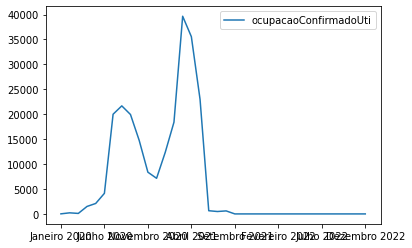

In [418]:
Result_GO.plot()

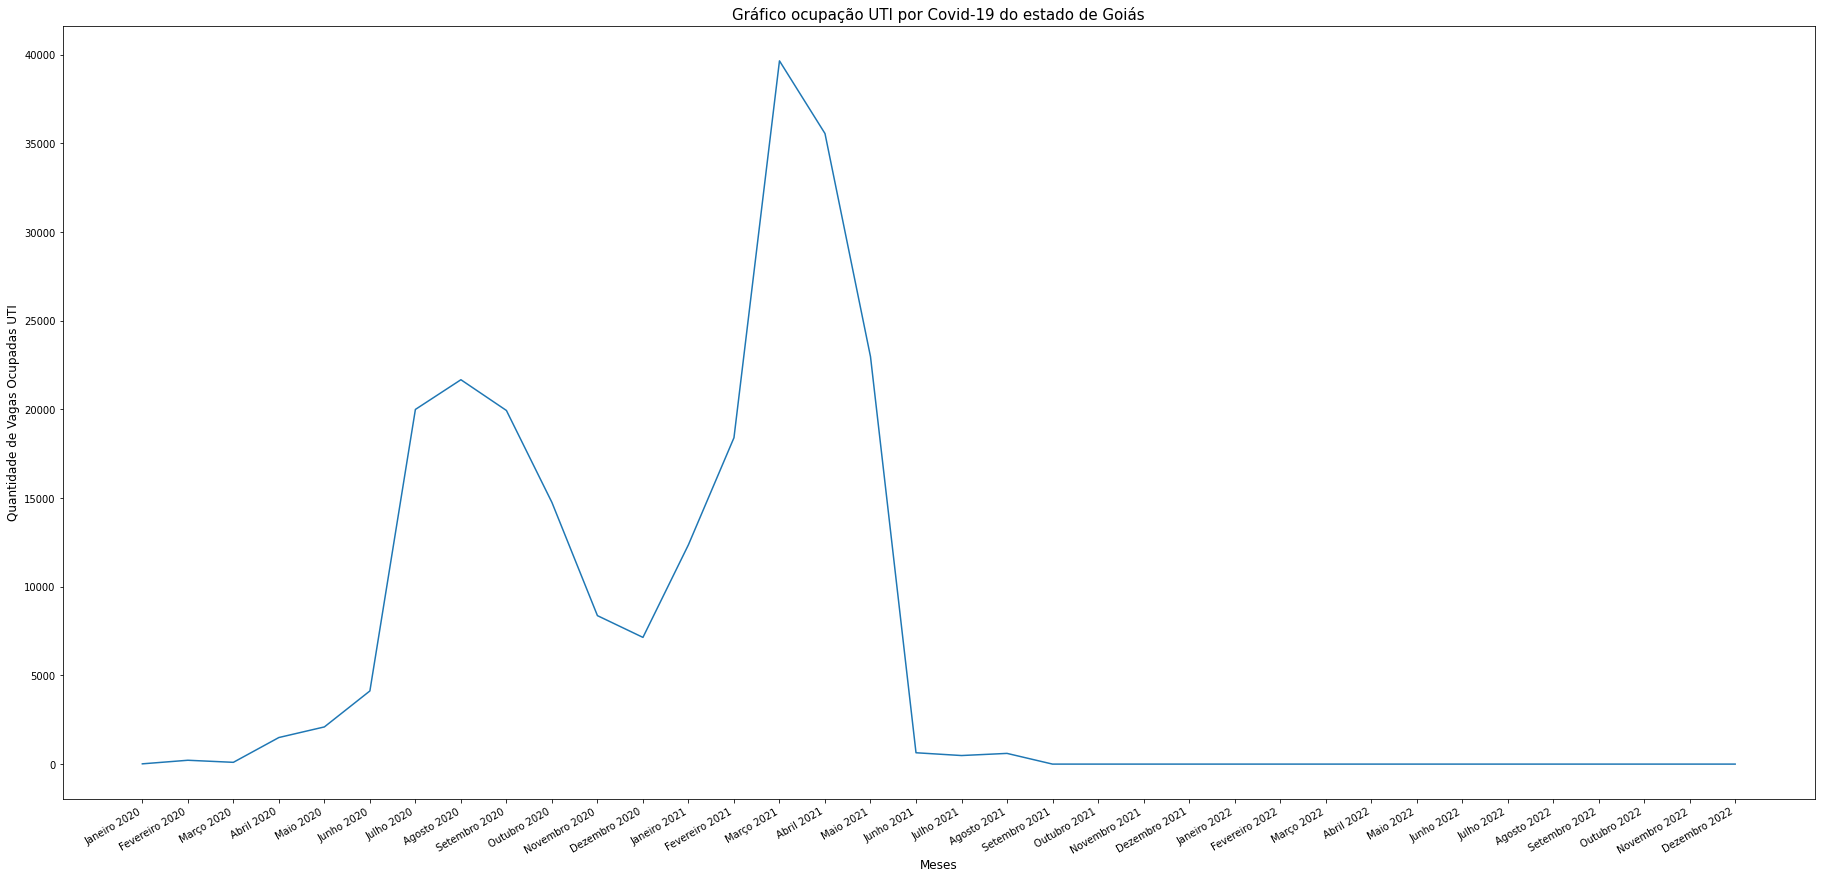

In [419]:
plt.figure(figsize=(31.4,15.8))
plt.title("Gráfico ocupação UTI por Covid-19 do estado de Goiás",fontsize=15)
plt.ylabel('Quantidade de Vagas Ocupadas UTI', fontsize = 12)
plt.xlabel('Meses',fontsize = 12)
plt.plot(Result_GO)
# Organiza o eixo x de modo a facilitar a visulização dos dados
plt.gcf().autofmt_xdate() 
#plt.legend()
plt.show()

In [420]:
Result_GO

,ocupacaoConfirmadoUti
Janeiro 2020,15.0
Fevereiro 2020,217.0
Março 2020,100.0
Abril 2020,1499.0
Maio 2020,2097.0
Junho 2020,4126.0
Julho 2020,20002.0
Agosto 2020,21677.0
Setembro 2020,19943.0
Outubro 2020,14757.0


**Óbitos Confirmados Covid-19**

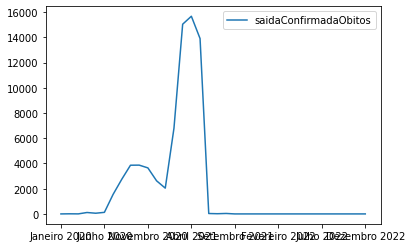

In [421]:
Result_GO_Obitos.plot()

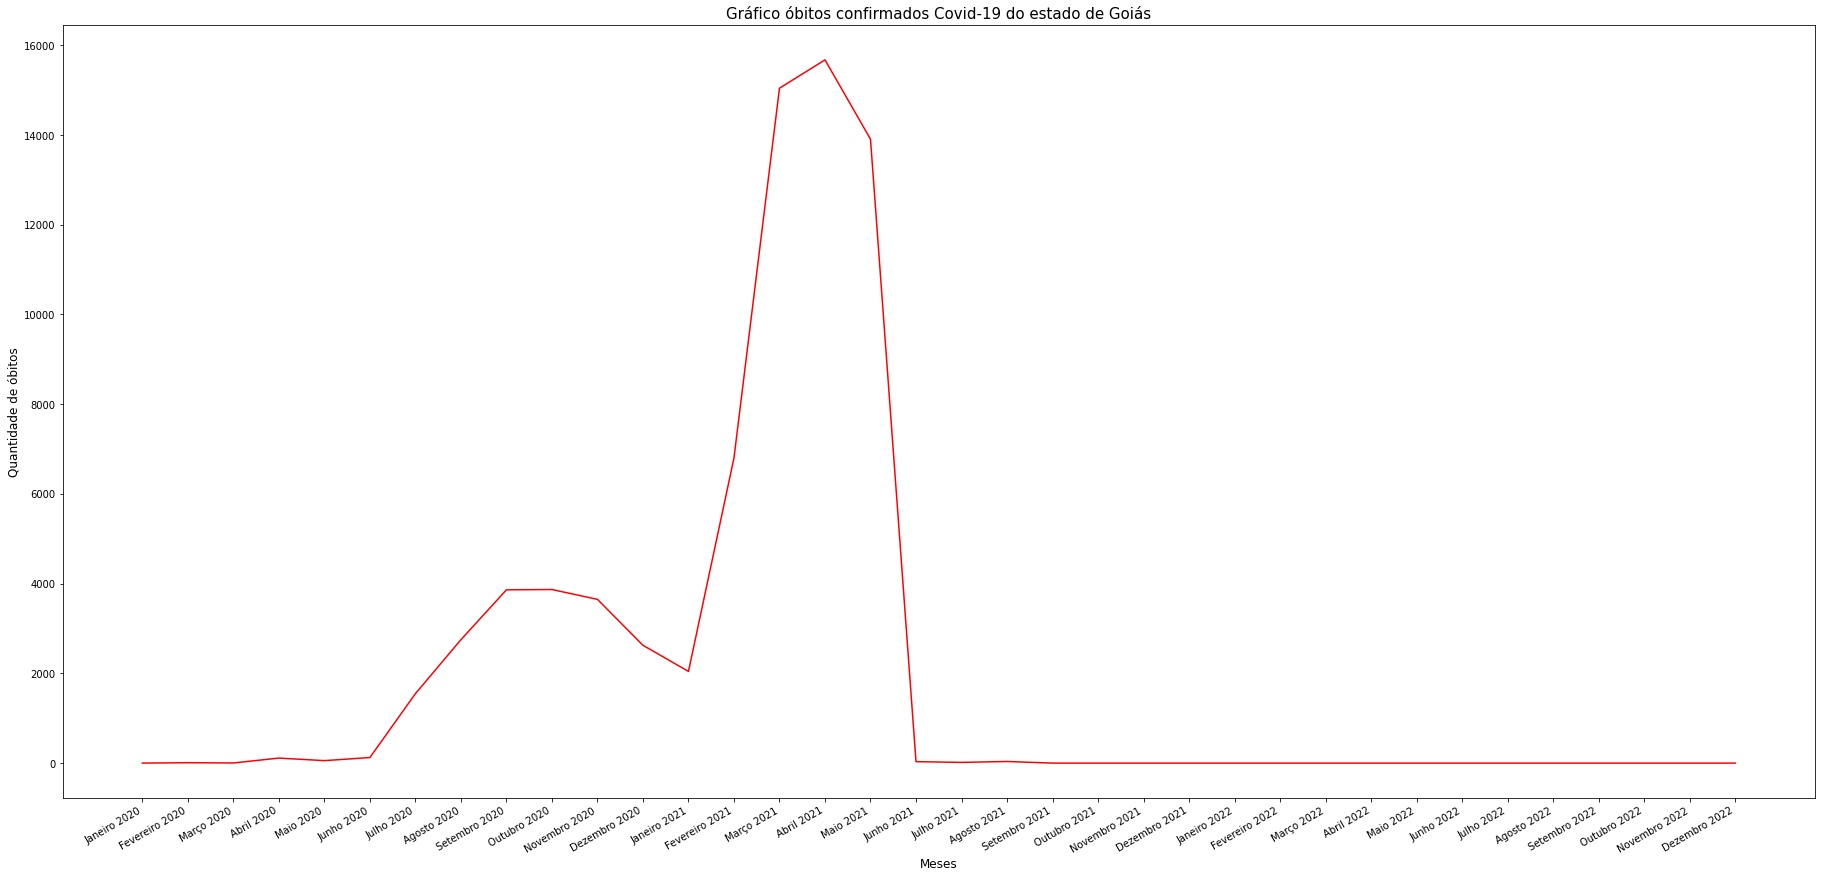

In [422]:
plt.figure(figsize=(31.4,15.8))
plt.title("Gráfico óbitos confirmados Covid-19 do estado de Goiás",fontsize=15)
plt.ylabel('Quantidade de óbitos', fontsize = 12)
plt.xlabel('Meses',fontsize = 12)
plt.plot(Result_GO_Obitos, color = 'red')
# Organiza o eixo x de modo a facilitar a visulização dos dados
plt.gcf().autofmt_xdate() 
#plt.legend()
plt.show()

**Plotar ambos gráficos juntos**

In [423]:
#plt.plot(Result_GO['A'], Result_GO['B'], linestyle='--', marker='o', color = 'blue', markersize = 4)
#plt.plot(Result_GO_Obitos['A'], Result_GO_Obitos['D'], linestyle='--', marker='o', color = 'red', markersize = 4)

# **Gráficos - Mato Grosso**

**Ocupação UTI - Covid**

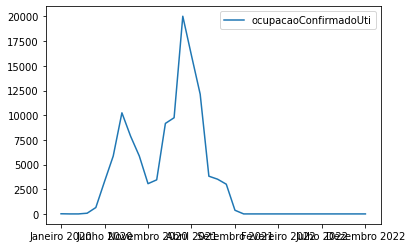

In [424]:
Result_MT.plot()

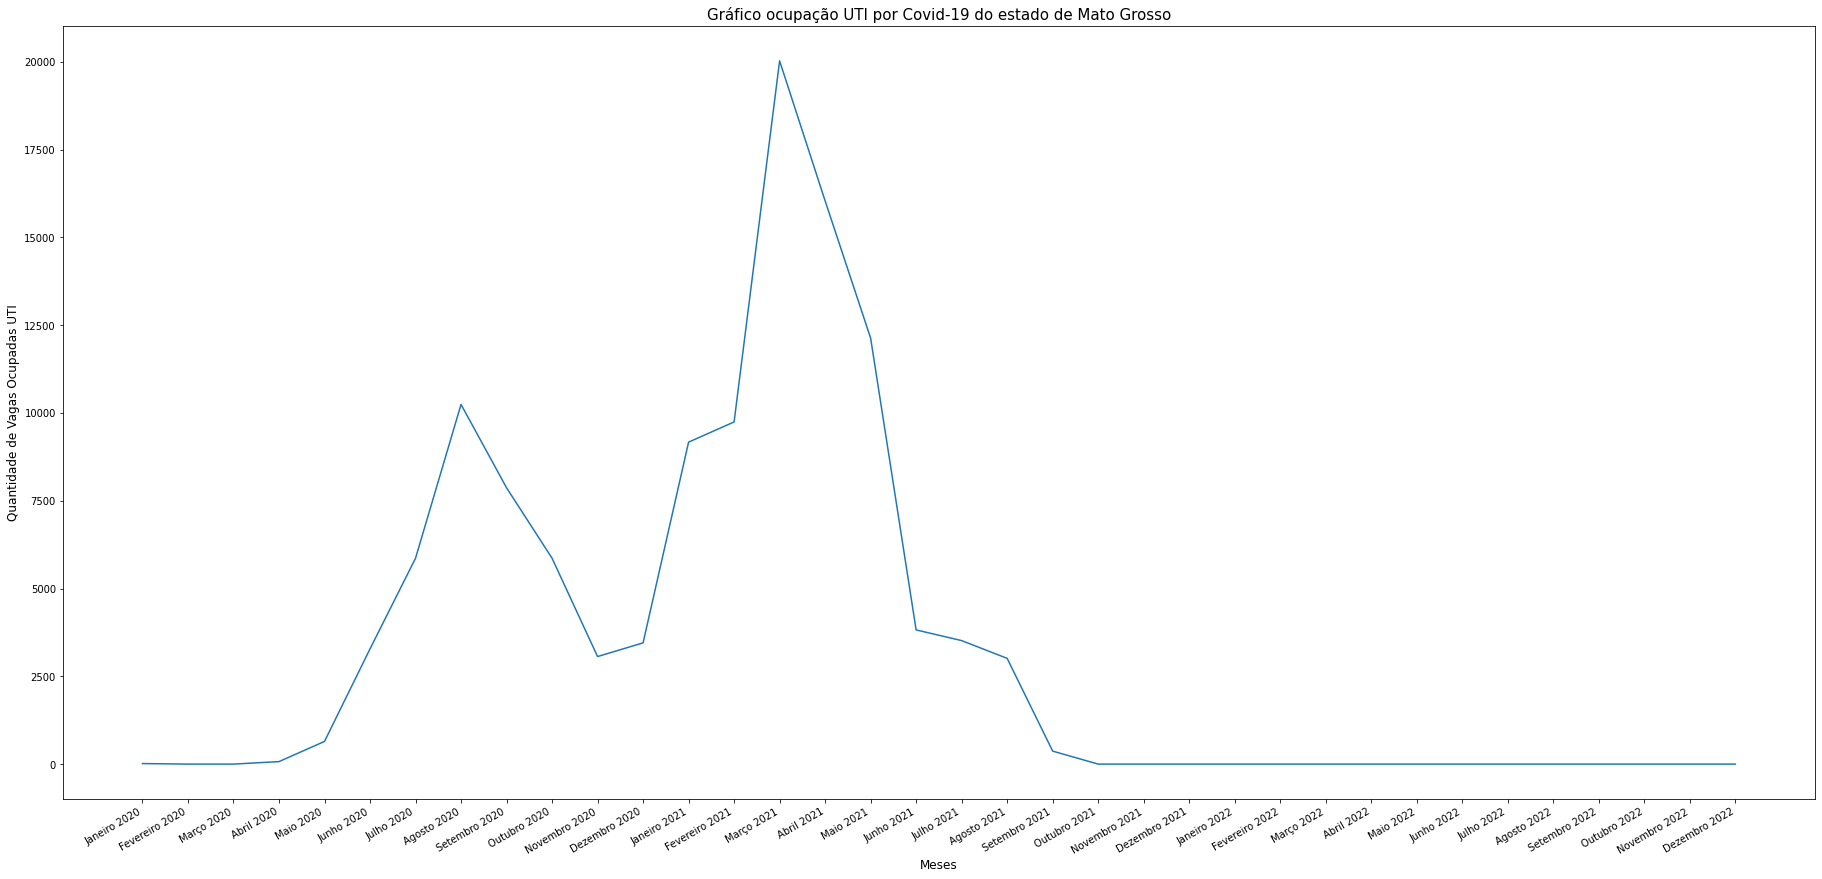

In [425]:
plt.figure(figsize=(31.4,15.8))
plt.title("Gráfico ocupação UTI por Covid-19 do estado de Mato Grosso",fontsize=15)
plt.ylabel('Quantidade de Vagas Ocupadas UTI', fontsize = 12)
plt.xlabel('Meses',fontsize = 12)
plt.plot(Result_MT)
# Organiza o eixo x de modo a facilitar a visulização dos dados
plt.gcf().autofmt_xdate() 
#plt.legend()
plt.show()

**Óbitos Confirmados Covid-19**

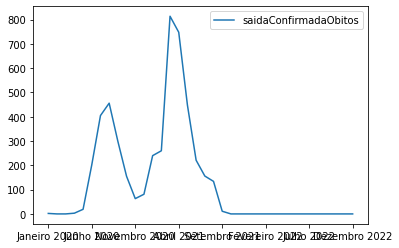

In [426]:
Result_MT_Obitos.plot()

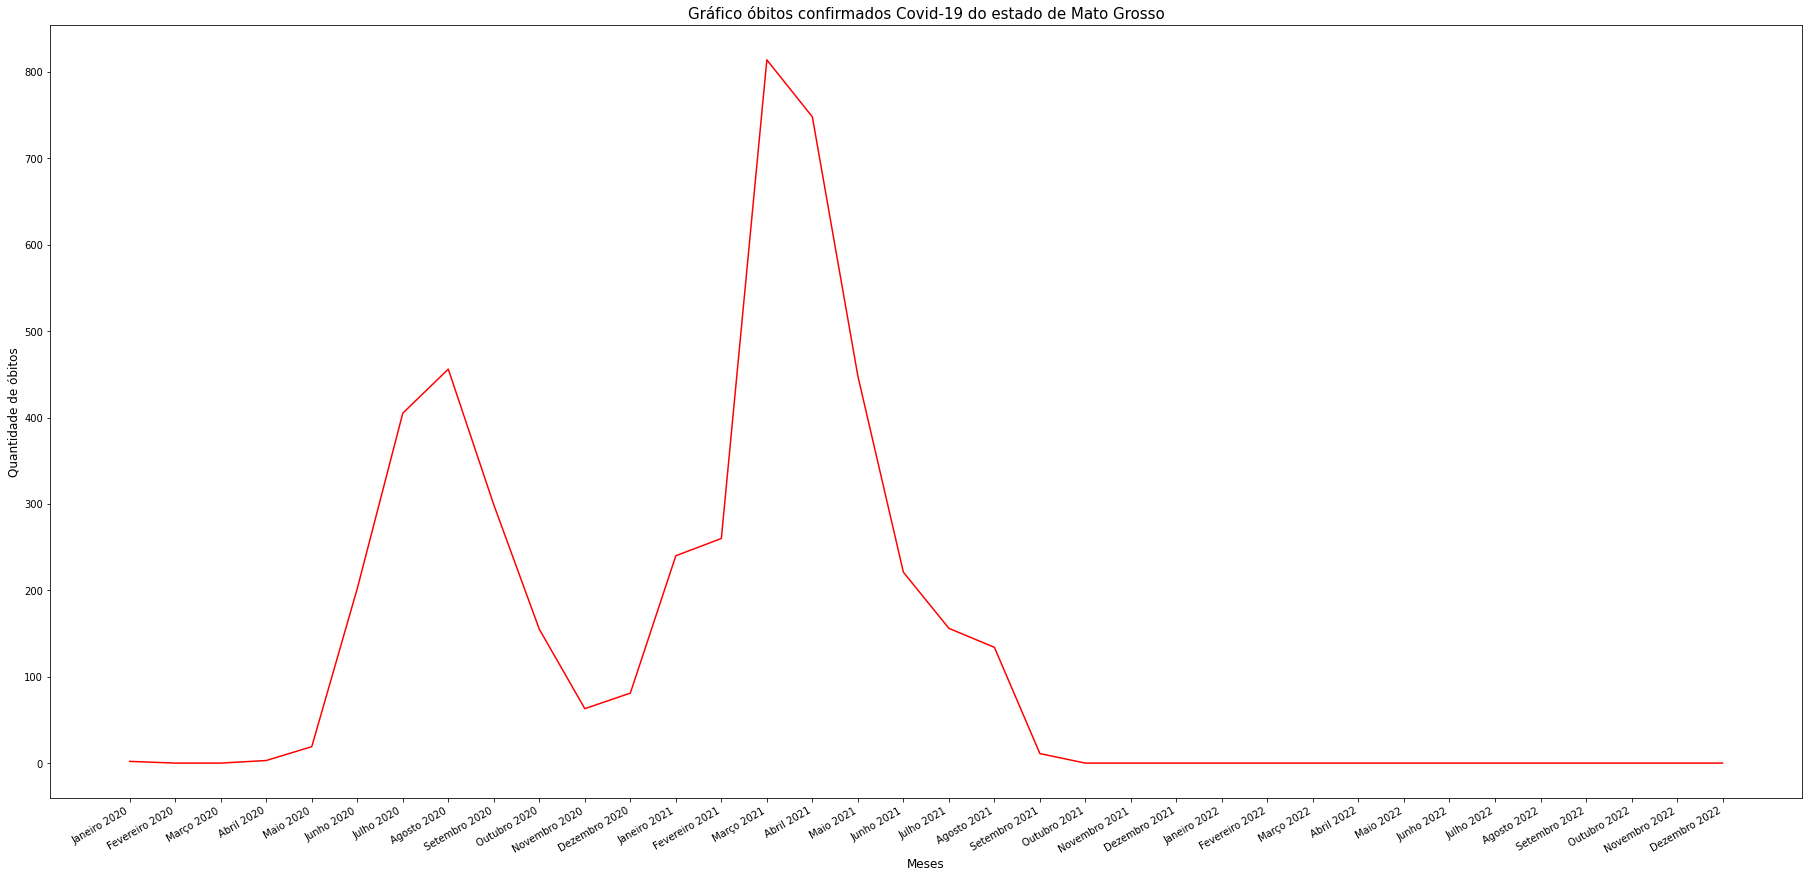

In [427]:
plt.figure(figsize=(31.4,15.8))
plt.title("Gráfico óbitos confirmados Covid-19 do estado de Mato Grosso",fontsize=15)
plt.ylabel('Quantidade de óbitos', fontsize = 12)
plt.xlabel('Meses',fontsize = 12)
plt.plot(Result_MT_Obitos, color = 'red')
# Organiza o eixo x de modo a facilitar a visulização dos dados
plt.gcf().autofmt_xdate() 
#plt.legend()
plt.show()

# **Gráficos - Mato Grosso do Sul**

**Ocupação UTI - Covid**

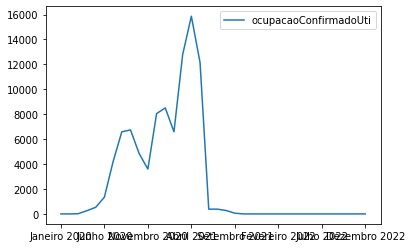

In [428]:
Result_MS.plot()

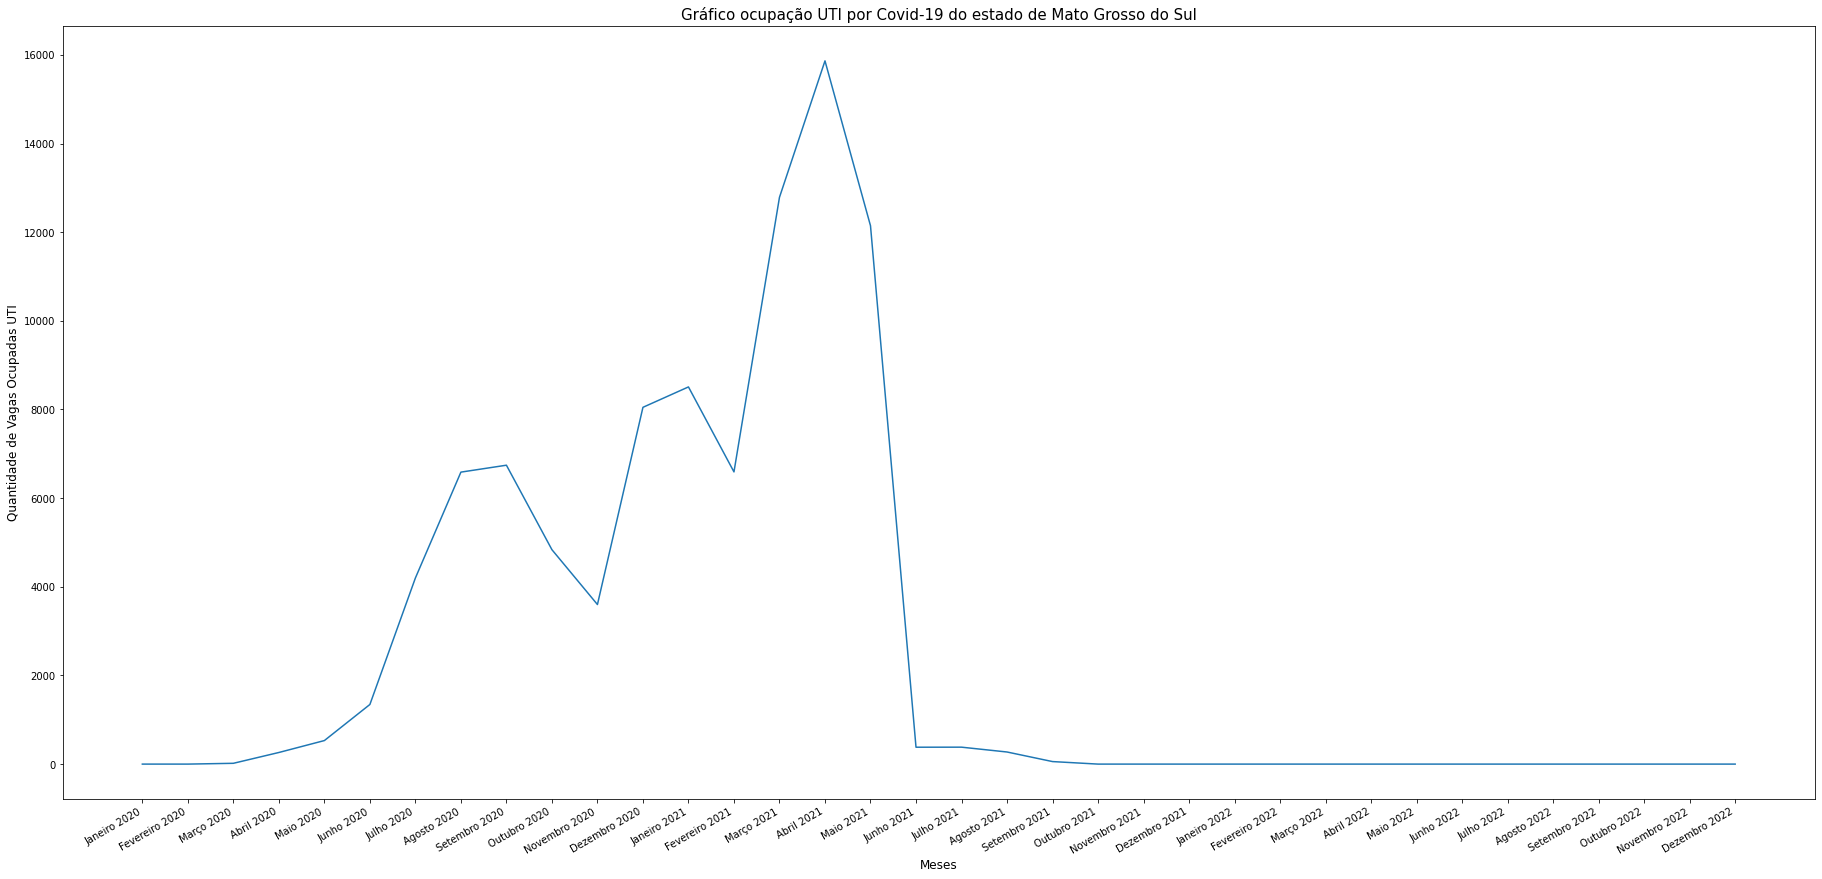

In [429]:
plt.figure(figsize=(31.4,15.8))
plt.title("Gráfico ocupação UTI por Covid-19 do estado de Mato Grosso do Sul",fontsize=15)
plt.ylabel('Quantidade de Vagas Ocupadas UTI', fontsize = 12)
plt.xlabel('Meses',fontsize = 12)
plt.plot(Result_MS)
# Organiza o eixo x de modo a facilitar a visulização dos dados
plt.gcf().autofmt_xdate() 
#plt.legend()
plt.show()

**Óbitos Confirmados Covid-19**

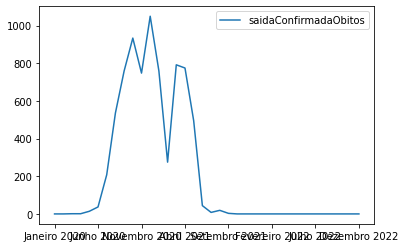

In [430]:
Result_MS_Obitos.plot()

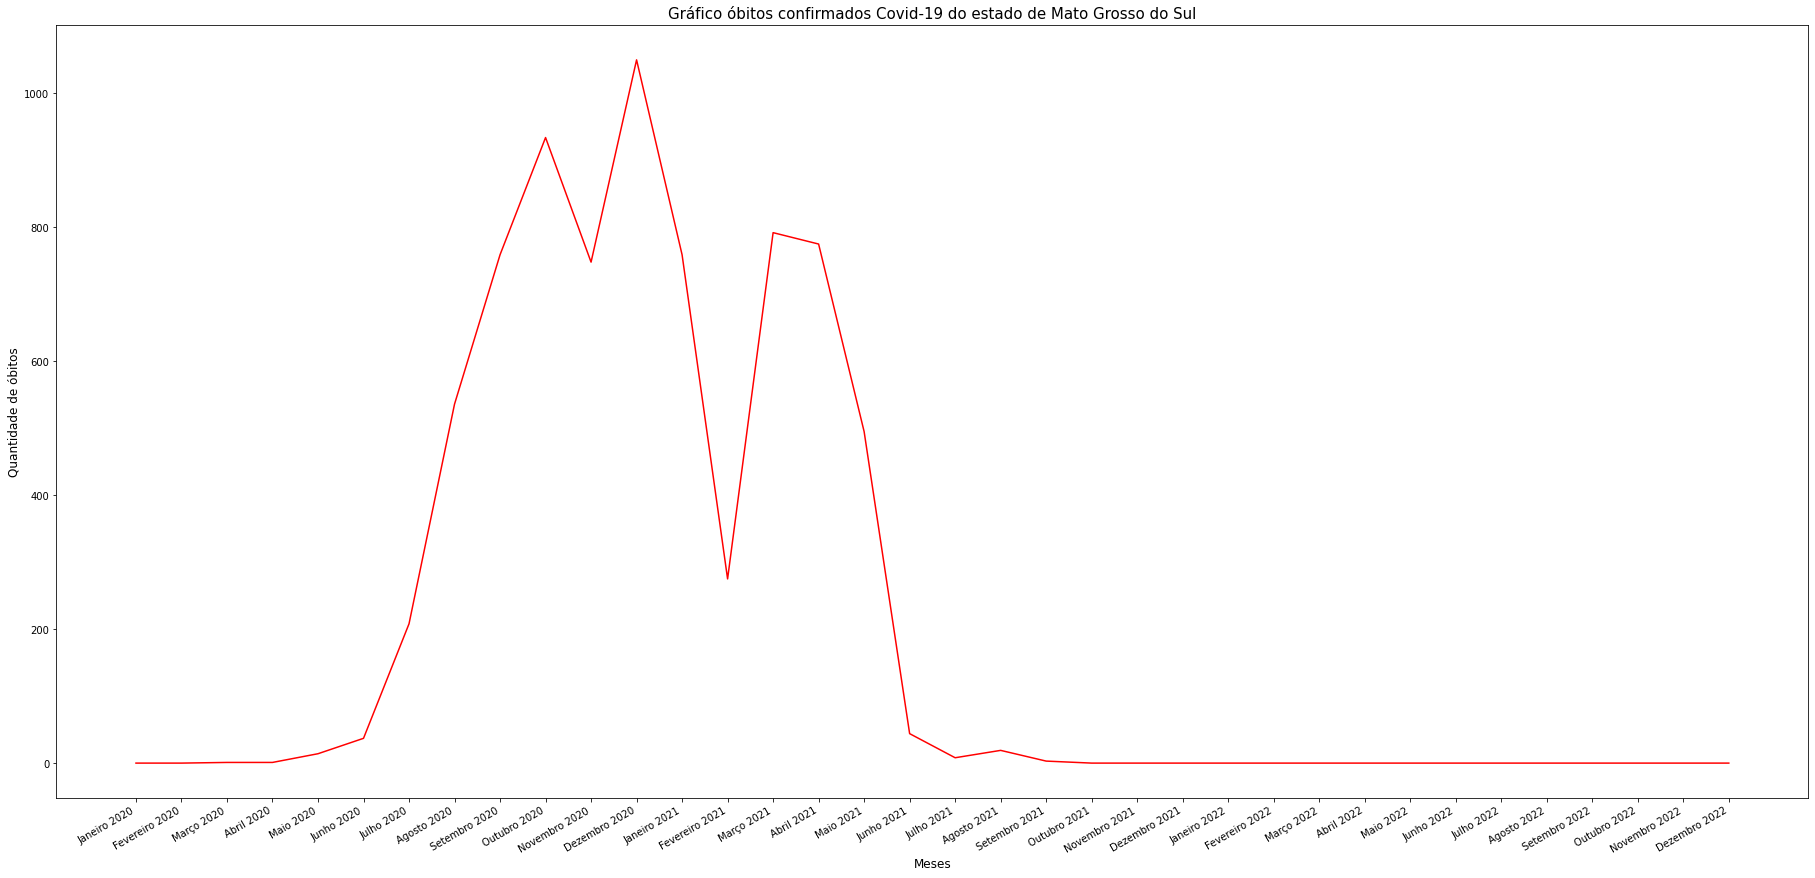

In [431]:
plt.figure(figsize=(31.4,15.8))
plt.title("Gráfico óbitos confirmados Covid-19 do estado de Mato Grosso do Sul",fontsize=15)
plt.ylabel('Quantidade de óbitos', fontsize = 12)
plt.xlabel('Meses',fontsize = 12)
plt.plot(Result_MS_Obitos, color = 'red')
# Organiza o eixo x de modo a facilitar a visulização dos dados
plt.gcf().autofmt_xdate() 
#plt.legend()
plt.show()

# **Gráficos - Distrito Federal**

**Ocupação UTI - Covid**

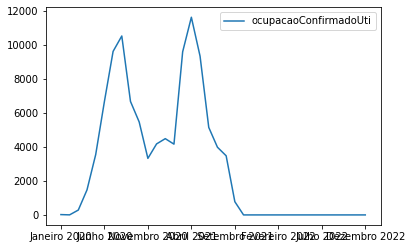

In [432]:
Result_DF.plot()

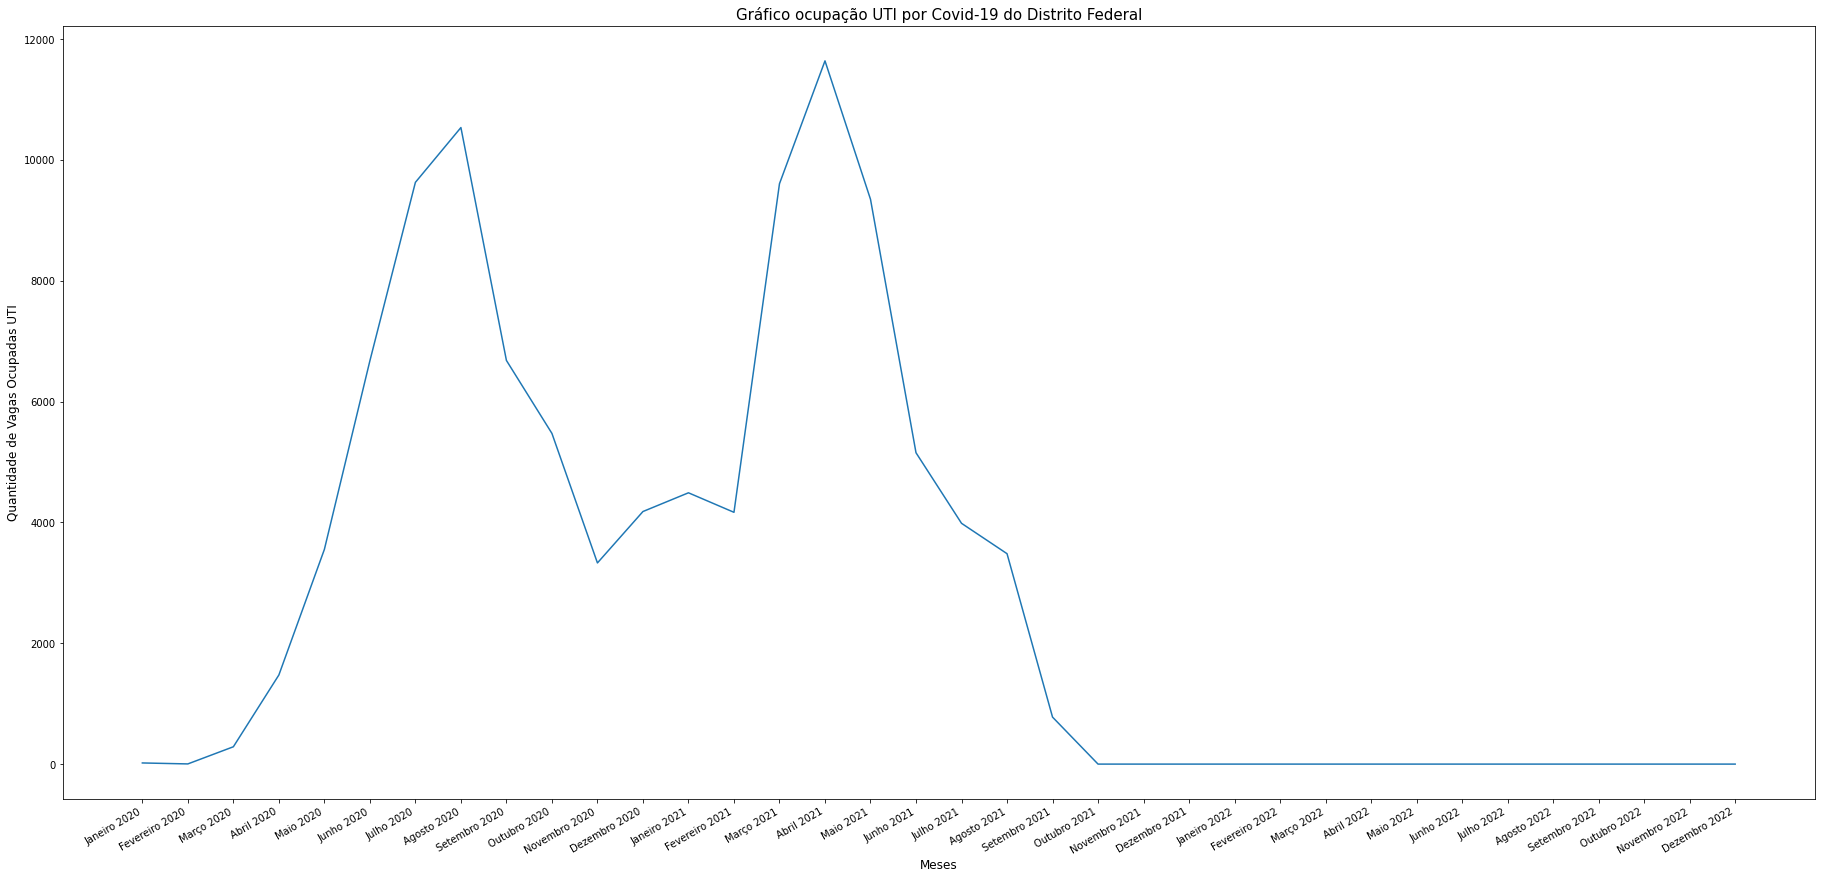

In [433]:
plt.figure(figsize=(31.4,15.8))
plt.title("Gráfico ocupação UTI por Covid-19 do Distrito Federal",fontsize=15)
plt.ylabel('Quantidade de Vagas Ocupadas UTI', fontsize = 12)
plt.xlabel('Meses',fontsize = 12)
plt.plot(Result_DF)
# Organiza o eixo x de modo a facilitar a visulização dos dados
plt.gcf().autofmt_xdate() 
#plt.legend()
plt.show()

**Óbitos Confirmados Covid-19**

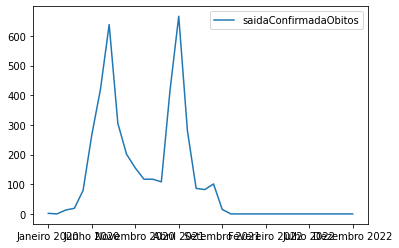

In [434]:
Result_DF_Obitos.plot()

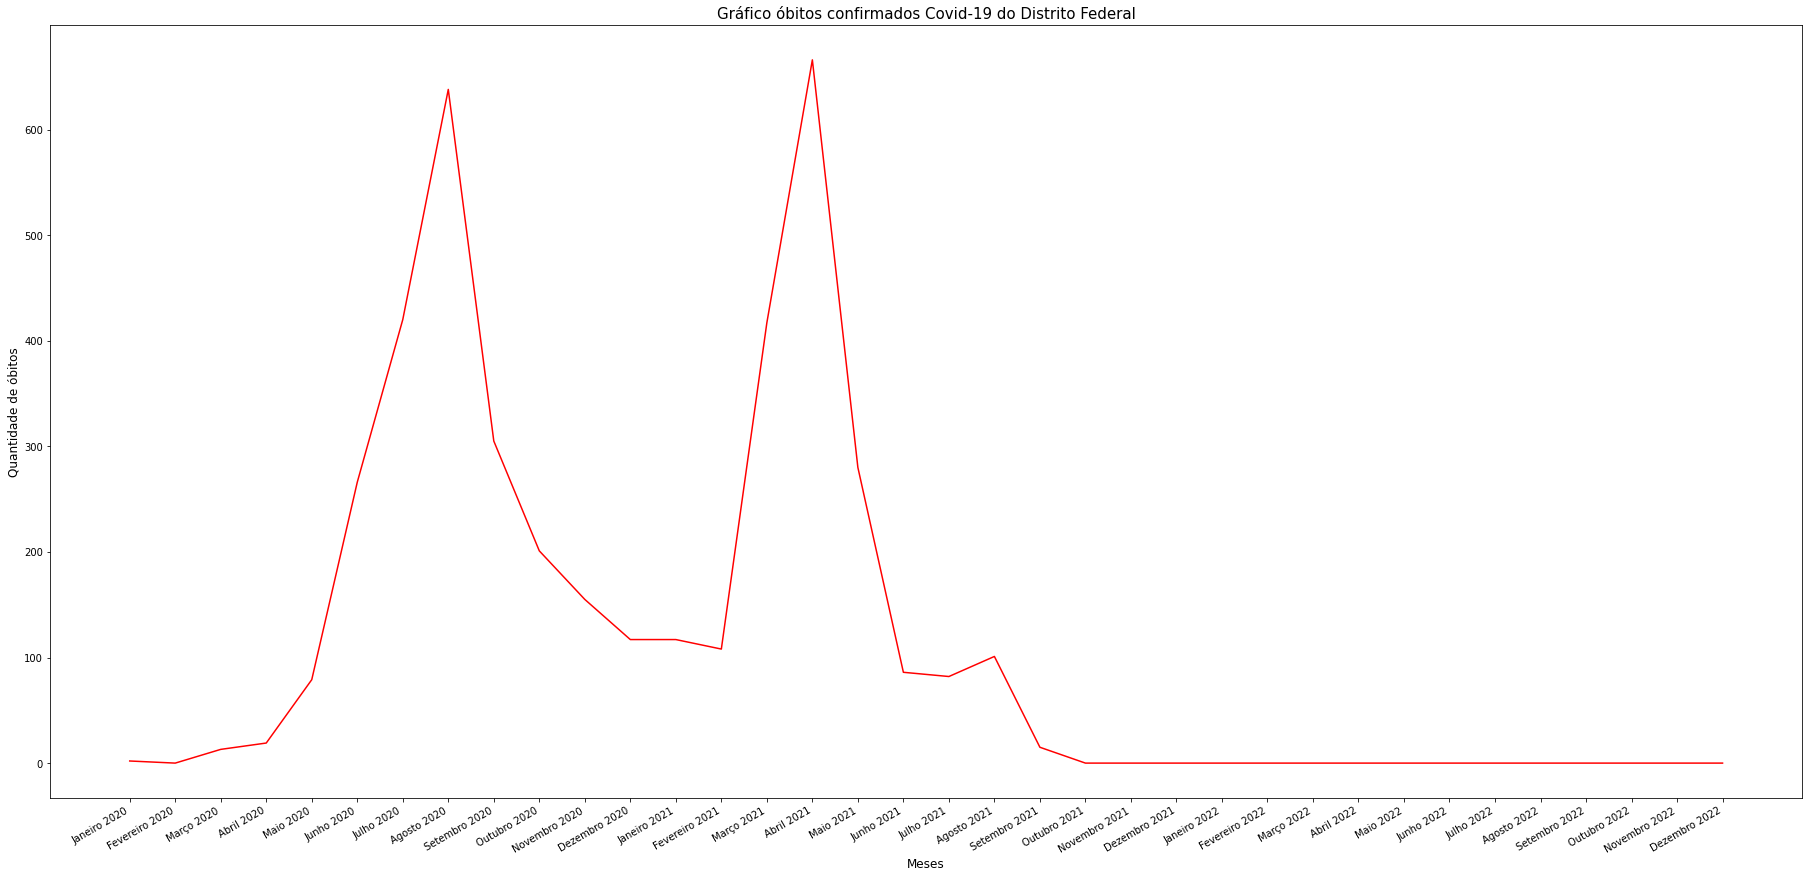

In [435]:
plt.figure(figsize=(31.4,15.8))
plt.title("Gráfico óbitos confirmados Covid-19 do Distrito Federal",fontsize=15)
plt.ylabel('Quantidade de óbitos', fontsize = 12)
plt.xlabel('Meses',fontsize = 12)
plt.plot(Result_DF_Obitos, color = 'red')
# Organiza o eixo x de modo a facilitar a visulização dos dados
plt.gcf().autofmt_xdate() 
#plt.legend()
plt.show()